In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data = pd.read_csv("hh_final_merged.csv")
data_USA = pd.read_csv("top_us_states_vacancies_20251111_172451.csv")

In [ ]:
data

,id,title,description,avg_salary,currency,employer,city,search_query,employment,remote,published_at,url
0,127202494,ML-аналитик / Data Scientist,"Уверенное владение Python, pandas, scikit-lear...",NaN,NaN,ЮНИСТРИМ БАНК,Москва,data scientist,Полная занятость,Очная,2025-11-01T09:09:01+0300,https://hh.ru/vacancy/127202494
1,127139735,Junior Data Scientist,"Знание Python и ключевых библиотек (Pandas, Sc...",NaN,NaN,IDF Eurasia,Москва,data scientist,Полная занятость,Удалённая,2025-10-30T12:17:23+0300,https://hh.ru/vacancy/127139735
2,126209623,"Стажер, Data Analyst / Data Scientist","Знания реляционных баз данных (SQL, ER диаграм...",NaN,NaN,Kept (Кэпт),Москва,data scientist,Полная занятость,Гибрид,2025-10-06T18:43:16+0300,https://hh.ru/vacancy/126209623
3,126311801,Системный аналитик,"Высшее образование: ИТ, Технические специально...",400000.0,RUR,Bgstaff,Москва,data scientist,Полная занятость,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
4,126984712,Data Scientist,"Высшее образование (техническое, математическо...",NaN,NaN,АДВ,Москва,data scientist,Полная занятость,Гибрид,2025-10-27T12:41:12+0300,https://hh.ru/vacancy/126984712
...,...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,"...сервера IP-телефонии FreePBX, SQL-серверов)...",115000.0,RUR,ГК Планета Авто,Челябинск,senior системный администратор,Полная занятость,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,125938955,Ведущий системный администратор,"Знание принципов работы протоколов TCP/IP, про...",100000.0,RUR,Уральский Комплектующий Завод,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,126696734,Ведущий инженер отдела информационных технологий,Высшее профессиональное образование в сфере ин...,70000.0,RUR,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,124687789,Системный администратор (ведущий инженер отдел...,Компетенции (что должен знать и уметь). - знат...,55000.0,RUR,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39613 entries, 0 to 39612
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            39613 non-null  int64  
 1   title         39613 non-null  object 
 2   description   39613 non-null  object 
 3   avg_salary    21088 non-null  float64
 4   currency      21390 non-null  object 
 5   employer      39613 non-null  object 
 6   city          39613 non-null  object 
 7   search_query  39613 non-null  object 
 8   employment    39613 non-null  object 
 9   remote        39613 non-null  object 
 10  published_at  39613 non-null  object 
 11  url           39613 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.6+ MB


Заметим, что None есть только в колонках с зарплатой и валютой соответственно, их чуть меньше 50%, но удалим все None, чтобы не искажать данные, потому что для проекта надо найти наиболее четкую зарплатную вилку. Мы думаем, что пропусков настолько много, потому что работадатели предпочитают не указывать напрямую зп, а только после собеседования или личного общения.

In [ ]:
data_clean= data.dropna()
#data_clean


In [ ]:
data_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15257 entries, 0 to 15256
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           15257 non-null  object
 1   Company         15256 non-null  object
 2   Location        10218 non-null  object
 3   Work_Format     15257 non-null  object
 4   Salary          8761 non-null   object
 5   URL             15257 non-null  object
 6   Posted_Date     5207 non-null   object
 7   Qualifications  8573 non-null   object
 8   Search_Query    15257 non-null  object
 9   Parsing_Date    15257 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


Убрали снова около 50% строк, так как целевая переменная является важной частью анализа и не подвергается дозаполнению

In [ ]:
data_clean_USA = data_USA.dropna(subset=['Salary'])
data_clean_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 0 to 15256
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           8761 non-null   object
 1   Company         8760 non-null   object
 2   Location        5594 non-null   object
 3   Work_Format     8761 non-null   object
 4   Salary          8761 non-null   object
 5   URL             8761 non-null   object
 6   Posted_Date     3332 non-null   object
 7   Qualifications  4855 non-null   object
 8   Search_Query    8761 non-null   object
 9   Parsing_Date    8761 non-null   object
dtypes: object(10)
memory usage: 752.9+ KB


In [ ]:
data_clean_USA=data_clean_USA.drop('Parsing_Date', axis=1)

Можем заметить, что None также еще много в Date, квалификации и локации. Это может быть из за проблем с заполнением заявок, а также проблем со сбором даты. Их не убираем, просто где то не будем учитывать

In [ ]:
data_dub=data.drop('published_at', axis=1)
data_dub.duplicated().sum()

np.int64(0)

In [ ]:
data_USA_dub=data_clean_USA.drop('Posted_Date', axis=1)
data_USA_dub.duplicated().sum()

np.int64(1693)

In [ ]:
data_clean_USA
duplicates_sorted = data_clean_USA[data_clean_USA.duplicated(keep=False)].sort_values(by=data_clean_USA.columns.tolist())
print(duplicates_sorted)

                                              Title        Company  \
7632                          .NET Backend Engineer            GMV   
12587                         .NET Backend Engineer            GMV   
12881                         .NET Backend Engineer            GMV   
9260                                 .NET Developer  Web Wisor Inc   
13019                                .NET Developer  Web Wisor Inc   
...                                             ...            ...   
14254                                 iOS Developer            CAI   
10110                                 iOS Developer         CEDENT   
14215                                 iOS Developer         CEDENT   
7032   iOS Software Engineer, Mobile Infrastructure        Dropbox   
15210  iOS Software Engineer, Mobile Infrastructure        Dropbox   

              Location    Work_Format                      Salary  \
7632   Los Angeles, CA  Not specified   $90,000 - $130,000 a year   
12587  Los Angeles, C

In [ ]:
data_clean_USA = data_clean_USA.drop_duplicates(keep='first')

In [ ]:
data_clean_USA

,Title,Company,Location,Work_Format,Salary,URL,Posted_Date,Qualifications,Search_Query
0,Entry-Level Data Science Engineer (Tier 1 STEM...,FULLPRESS,United States,Not specified,"$55,000 a year",https://www.simplyhired.com/job/QJ54eGe79l69Gt...,2025-11-04,"experience with python, sql, python",data scientist
4,Data Scientist,JPS Tech Solutions LLC,NaN,Remote,$53 a hour,https://www.simplyhired.com/job/48FU4NZq7zl5mm...,2025-11-10,data science,data scientist
8,Jr. Marketing Data Scientist,CDW,NaN,Remote,"$84,000 - $116,800 a year",https://www.simplyhired.com/job/CkhlZ53BIGbZx1...,2025-11-09,"data science, degree in data science",data scientist
13,"Data Scientist, New Graduate",Duolingo,"Pittsburgh, PA",Not specified,"$123,300 - $166,800 a year",https://www.simplyhired.com/job/Ob2IT0ggYWL_L_...,NaN,degree in a quantitative field,data scientist
14,Data Scientist(Early-Stage Startup),Prachub,NaN,Remote,"$111,567 a year",https://www.simplyhired.com/job/d-O_QNB3nNEagZ...,NaN,"degree in computer science, data science",data scientist
...,...,...,...,...,...,...,...,...,...
15154,Senior Computer Systems Engineer Architect - 1...,Citizant,"Chantilly, VA",Not specified,"$126,200 a year",https://www.simplyhired.com/job/U8LydYXlonZQmS...,NaN,knowledge of various programming languages and...,senior system administrator
15155,"IT Senior Specialist, Governance, Risk & Compl...",Corning,"Painted Post, NY",Not specified,"$104,590 - $143,812 a year",https://www.simplyhired.com/job/kW-nPMc6GD51qa...,2025-11-07,NaN,senior system administrator
15184,Quant Developer - Treasury,Millennium Management,"New York, NY",Not specified,"$175,000 - $250,000 a year",https://www.simplyhired.com/job/Zz8Jx9IGux_Fds...,2025-11-11,NaN,middle python developer
15202,Developer III - Application Development (Data ...,Inland Empire Health Plan,"Rancho Cucamonga, CA",Not specified,"$118,601 a year",https://www.simplyhired.com/job/fnS-bYc6HeeoGj...,NaN,"degree in a science, sql",middle python developer


Радует, что нет дубликатов в 1 датасете с hh, в американском есть, причем совпадает даже дата, видимо у сайта возможны пролаги при нажатии на опубликовать и возможны дублирования из за этого. Удалили 1687 дубликатов

**Реструктуризация датасета hh**

In [ ]:
#data_clean['currency'].unique()
data_clean2 = data_clean.drop('currency', axis=1)
data_clean2

,id,title,description,avg_salary,employer,city,search_query,employment,remote,published_at,url
3,126311801,Системный аналитик,"Высшее образование: ИТ, Технические специально...",400000.0,Bgstaff,Москва,data scientist,Полная занятость,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
5,126718438,Data Scientist (Junior),"Высшее образование (математическое, техническо...",100000.0,BND LLC,Москва,data scientist,Полная занятость,Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438
8,127063385,"Junior Data Scientist (Python, ML) / Дата-сайе...",Понимание принципов машинного обучения и стати...,90000.0,Rubbles,Москва,data scientist,Полная занятость,Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385
9,126970916,Ведущий разработчик искусственного интеллекта/...,Опыт работы: от 1 года. - Высшее физико-матема...,180000.0,Геномед,Москва,data scientist,Полная занятость,Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916
14,127181192,Data Scientist,Опыт работы на позиции <highlighttext>Data</hi...,325000.0,LIAN,Москва,data scientist,Полная занятость,Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192
...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,"...сервера IP-телефонии FreePBX, SQL-серверов)...",115000.0,ГК Планета Авто,Челябинск,senior системный администратор,Полная занятость,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,125938955,Ведущий системный администратор,"Знание принципов работы протоколов TCP/IP, про...",100000.0,Уральский Комплектующий Завод,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,126696734,Ведущий инженер отдела информационных технологий,Высшее профессиональное образование в сфере ин...,70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,124687789,Системный администратор (ведущий инженер отдел...,Компетенции (что должен знать и уметь). - знат...,55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


он не нужен. Просто пишет про валюту

In [ ]:
data_clean2 = data_clean2[data_clean2['employment']=='Полная занятость']
data_clean2 = data_clean2.drop('employment', axis=1)

Рассматриваем только столбцы, которые есть в обоих датасетах, и только полную занятость, потому что других видов занятости мало, а из за этого становится больше выбросов.

In [ ]:
data_clean2 = data_clean2.drop('id', axis=1)

In [ ]:
data_clean2

,title,description,avg_salary,employer,city,search_query,remote,published_at,url
3,Системный аналитик,"Высшее образование: ИТ, Технические специально...",400000.0,Bgstaff,Москва,data scientist,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
5,Data Scientist (Junior),"Высшее образование (математическое, техническо...",100000.0,BND LLC,Москва,data scientist,Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438
8,"Junior Data Scientist (Python, ML) / Дата-сайе...",Понимание принципов машинного обучения и стати...,90000.0,Rubbles,Москва,data scientist,Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385
9,Ведущий разработчик искусственного интеллекта/...,Опыт работы: от 1 года. - Высшее физико-матема...,180000.0,Геномед,Москва,data scientist,Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916
14,Data Scientist,Опыт работы на позиции <highlighttext>Data</hi...,325000.0,LIAN,Москва,data scientist,Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192
...,...,...,...,...,...,...,...,...,...
39608,Ведущий системный администратор,"...сервера IP-телефонии FreePBX, SQL-серверов)...",115000.0,ГК Планета Авто,Челябинск,senior системный администратор,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,Ведущий системный администратор,"Знание принципов работы протоколов TCP/IP, про...",100000.0,Уральский Комплектующий Завод,Челябинск,senior системный администратор,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,Ведущий инженер отдела информационных технологий,Высшее профессиональное образование в сфере ин...,70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,senior системный администратор,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,Системный администратор (ведущий инженер отдел...,Компетенции (что должен знать и уметь). - знат...,55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,senior системный администратор,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


In [ ]:
import re
data_clean=data_clean2
#data_clean
key_disc=[[] for _ in range(len(data_clean))]
mask_programming=[
        'python', 'pandas', 'numpy', 'scikit-learn', 'pytorch', 'tensorflow',
        'java', 'spring', 'hibernate', 'c++', 'golang', 'javascript', 'typescript',
        'react', 'vue', 'php', 'laravel', 'bitrix', 'rest api', 'graphql', 'fastapi', 'flask'
        ]
mask_ml=[
        'machine learning', 'ml', 'data science', 'deep learning', 'нейросет',
        'computer vision', 'cv', 'nlp', 'llm', 'gpt', 'transformer', 'ai',
        'рекомендательн', 'временные ряды', 'feature engineering', 'машинное обучение'
    ]
mask_dataeng=[
        'etl', 'elt', 'airflow', 'data pipeline', 'big data', 'hadoop', 'spark',
        'data warehouse', 'data lake', 'dwh', 'data vault', 'kafka', 'rabbitmq',
        'clickhouse', 'greenplum', 'data engineering'
    ]
mask_analytics=[
        'sql', 'power bi', 'tableau', 'datalens', 'superset', 'bi ', 'dashboard',
        'статистик', 'a/b тест', 'метрик', 'kpi', 'отчетность', 'аналитик',
        'data analyst', 'business intelligence'
    ]
mask_devops=[
        'docker', 'kubernetes', 'k8s', 'ci/cd', 'devops', 'monitoring',
        'prometheus', 'grafana', 'git', 'terraform', 'ansible', 'инфраструктур'
    ]
mask_hard=[
        'fintech', 'банк', 'e-commerce', 'маркетинг', 'реклам', 'медицин',
        'healthcare', 'кредитн', 'скоринг', 'retail', 'ритейл', 'телеком',
        'computer vision', 'recommendation', 'recommender'
    ]
mask_soft=[
        'data-driven', 'аналитическ', 'коммуникац', 'управлен', 'project management',
        'team', 'команд', 'лидерств', 'soft skills', 'гибк', 'адаптив'
    ]
mask_management = [
    'менеджер', 'manager', 'руководитель', 'team lead', 'тимлид', 'lead',
    'управление', 'управлен', 'project manager', 'продакт', 'product manager',
    'руководств', 'директор', 'director', 'head of', 'chief'
]

mask_sales = [
    'продаж', 'sales', 'коммерц', 'commercial', 'account manager', 'аккаунт',
    'менеджер по продажам', 'business development', 'развитие бизнеса',
    'клиентск', 'customer', 'партнер', 'partner', 'сейлз'
]

mask_hr = [
    'рекрутер', 'recruiter', 'hr', 'human resources', 'кадр', 'персонал',
    'подбор персонала', 'талант', 'talent', 'hr-', 'эйчар'
]

mask_design = [
    'дизайн', 'design', 'ui/', 'ux/', 'figma', 'photoshop', 'illustrator',
    'графическ', 'graphic', 'веб-дизайн', 'web design', 'дизайнер'
]

mask_support = [
    'поддержк', 'support', 'helpdesk', 'help desk', 'техническ', 'technical',
    'администрирован', 'administration', 'sysadmin', 'сисадмин'
]

mask_marketing = [
    'маркетинг', 'marketing', 'smm', 'смм', 'контент', 'content', 'копирайтер',
    'copywriter', 'трафик', 'traffic', 'продвижен', 'promotion', 'brand'
]

mask_qa = [
    'тестировщ', 'qa', 'quality assurance', 'контроль качеств', 'testing',
    'тестирован', 'test engineer', 'qa engineer'
]
def check_elements(deff, mask):
    for element in mask:
        if element in deff:
            return True
    return False
for i in range(len(data_clean['description'])):
  defenition=data_clean['description'].iloc[i].lower()
  if check_elements(defenition, mask_programming):
    key_disc[i].append('programming')
  if check_elements(defenition, mask_ml):
    key_disc[i].append('ml')
  if check_elements(defenition, mask_dataeng):
    key_disc[i].append('dataeng')
  if check_elements(defenition, mask_analytics):
    key_disc[i].append('analytics')
  if check_elements(defenition, mask_devops):
    key_disc[i].append('devops')
  if check_elements(defenition, mask_hard):
    key_disc[i].append('hard')
  if check_elements(defenition, mask_soft):
    key_disc[i].append('soft')
  if check_elements(defenition, mask_management):
      key_disc[i].append('management')
  if check_elements(defenition, mask_sales):
      key_disc[i].append('sales')
  if check_elements(defenition, mask_hr):
      key_disc[i].append('hr')
  if check_elements(defenition, mask_design):
      key_disc[i].append('design')
  if check_elements(defenition, mask_support):
      key_disc[i].append('support')
  if check_elements(defenition, mask_marketing):
      key_disc[i].append('marketing')
  if check_elements(defenition, mask_qa):
      key_disc[i].append('qa')
print(key_disc)

[['analytics', 'soft', 'support'], ['programming', 'ml', 'support'], ['programming', 'ml', 'analytics', 'soft'], ['ml', 'analytics', 'hard', 'support'], ['ml', 'dataeng'], ['hr'], ['hard'], ['programming', 'sales'], ['ml', 'soft', 'support'], ['ml', 'analytics', 'hard'], ['programming', 'ml', 'analytics', 'hard', 'sales', 'marketing'], ['ml', 'dataeng', 'support'], ['ml', 'analytics', 'soft', 'management'], ['ml'], ['programming', 'ml', 'hard'], ['programming', 'ml', 'analytics'], ['programming', 'ml'], ['programming', 'analytics', 'hard'], ['ml', 'analytics', 'soft', 'management', 'hr'], ['ml'], ['ml', 'support'], ['ml', 'analytics', 'support'], ['analytics', 'support'], ['analytics', 'support'], ['support'], ['analytics', 'support'], ['hard', 'management', 'sales', 'marketing'], ['soft', 'management'], ['programming', 'ml', 'support'], ['programming', 'analytics'], ['analytics', 'devops'], ['analytics', 'hard', 'sales', 'marketing'], ['analytics', 'sales'], ['analytics'], ['analytics

In [ ]:
data_clean

,title,description,avg_salary,employer,city,search_query,remote,published_at,url
3,Системный аналитик,"Высшее образование: ИТ, Технические специально...",400000.0,Bgstaff,Москва,data scientist,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
5,Data Scientist (Junior),"Высшее образование (математическое, техническо...",100000.0,BND LLC,Москва,data scientist,Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438
8,"Junior Data Scientist (Python, ML) / Дата-сайе...",Понимание принципов машинного обучения и стати...,90000.0,Rubbles,Москва,data scientist,Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385
9,Ведущий разработчик искусственного интеллекта/...,Опыт работы: от 1 года. - Высшее физико-матема...,180000.0,Геномед,Москва,data scientist,Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916
14,Data Scientist,Опыт работы на позиции <highlighttext>Data</hi...,325000.0,LIAN,Москва,data scientist,Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192
...,...,...,...,...,...,...,...,...,...
39608,Ведущий системный администратор,"...сервера IP-телефонии FreePBX, SQL-серверов)...",115000.0,ГК Планета Авто,Челябинск,senior системный администратор,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,Ведущий системный администратор,"Знание принципов работы протоколов TCP/IP, про...",100000.0,Уральский Комплектующий Завод,Челябинск,senior системный администратор,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,Ведущий инженер отдела информационных технологий,Высшее профессиональное образование в сфере ин...,70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,senior системный администратор,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,Системный администратор (ведущий инженер отдел...,Компетенции (что должен знать и уметь). - знат...,55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,senior системный администратор,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


Были слишком большие описания, мы их разбили по ключевым навыкам

**Реструктуризация датасета simply hired**

In [ ]:
import numpy as np
cities_list = [[] for _ in range(len(data_clean_USA))]

mask_new_york = [
    'new york, ny', 'new york', 'ny', 'new york city',
    'нью-йорк', 'nyc', 'manhattan, ny', 'brooklyn, ny',
    'queens, ny', 'bronx, ny', 'staten island, ny'
]

mask_los_angeles = [
    'los angeles, ca', 'los angeles', 'la', 'лос-анджелес',
    'los angeles county, ca', 'la county'
]

mask_chicago = [
    'chicago, il', 'chicago', 'чикаго', 'il'
]

mask_houston = [
    'houston, tx', 'houston', 'хьюстон', 'tx'
]

mask_phoenix = [
    'phoenix, az', 'phoenix', 'финикс', 'az'
]

mask_philadelphia = [
    'philadelphia, pa', 'philadelphia', 'филадельфия', 'pa'
]

mask_san_antonio = [
    'san antonio, tx', 'san antonio', 'сан-антонио'
]

mask_san_diego = [
    'san diego, ca', 'san diego', 'сан-диего'
]

def check_elements(text, mask_list):
    if pd.isna(text):
        return False
    text_lower = str(text).lower()
    return any(item in text_lower for item in mask_list)

for i in range(len(data_clean_USA)):
    location = data_clean_USA['Location'].iloc[i]

    if check_elements(location, mask_new_york):
        cities_list[i].append('new_york')
    elif check_elements(location, mask_los_angeles):
        cities_list[i].append('los_angeles')
    elif check_elements(location, mask_chicago):
        cities_list[i].append('chicago')
    elif check_elements(location, mask_houston):
        cities_list[i].append('houston')
    elif check_elements(location, mask_phoenix):
        cities_list[i].append('phoenix')
    elif check_elements(location, mask_philadelphia):
        cities_list[i].append('philadelphia')
    elif check_elements(location, mask_san_antonio):
        cities_list[i].append('san_antonio')
    elif check_elements(location, mask_san_diego):
        cities_list[i].append('san_diego')
    else:
        cities_list[i] = []

print(cities_list)
data_clean_USA['Location'] = cities_list

data_clean_USA['Location'] = data_clean_USA['Location'].apply(lambda x: x if x else np.nan)

[[], [], [], ['philadelphia'], [], ['houston'], [], [], [], [], [], ['los_angeles'], [], ['houston'], [], ['philadelphia'], ['los_angeles'], ['chicago'], ['los_angeles'], [], ['houston'], [], [], [], [], [], [], ['chicago'], [], [], ['chicago'], ['new_york'], ['chicago'], ['chicago'], [], [], ['philadelphia'], [], ['chicago'], [], ['los_angeles'], [], [], ['new_york'], [], [], [], [], [], [], [], ['new_york'], [], [], [], ['new_york'], ['los_angeles'], [], [], ['chicago'], [], ['chicago'], [], [], ['chicago'], [], ['chicago'], [], ['philadelphia'], ['chicago'], [], [], ['houston'], ['chicago'], ['new_york'], ['chicago'], [], ['san_diego'], ['new_york'], ['san_diego'], [], [], [], [], ['los_angeles'], [], ['new_york'], ['chicago'], [], [], [], [], [], [], [], [], [], [], ['chicago'], [], ['new_york'], [], [], [], [], [], [], ['los_angeles'], ['chicago'], [], ['new_york'], [], ['chicago'], [], [], ['new_york'], [], [], ['houston'], [], ['chicago'], [], [], ['san_diego'], [], ['new_york']

Выделили 8 крупнейших городов Америки

In [ ]:
def calculate_salary(text):
    if pd.isna(text):
        return None

    text = str(text)

    numbers = re.findall(r'\d+[\.,]?\d*', text)
    numbers = [float(num.replace(',', '')) for num in numbers]

    if not numbers:
        return None

    avg_salary = sum(numbers[:2]) / len(numbers[:2])

    text_lower = text.lower()
    if any(word in text_lower for word in ['hour', 'hr', '/h']):
        return avg_salary * 160
    elif any(word in text_lower for word in ['day', 'daily', '/d']):
        return avg_salary * 20
    elif any(word in text_lower for word in ['year', 'annual', '/y']):
        return avg_salary / 12
    else:
        return avg_salary

data_clean_USA['Salary'] = data_clean_USA['Salary'].apply(calculate_salary)
data_clean_USA["Salary"] = (data_clean_USA["Salary"] * 23.7).round(0).astype("Int64")
data_clean_USA.head()

,Title,Company,Location,Work_Format,Salary,URL,Posted_Date,Qualifications,Search_Query
0,Entry-Level Data Science Engineer (Tier 1 STEM...,FULLPRESS,NaN,Not specified,108625,https://www.simplyhired.com/job/QJ54eGe79l69Gt...,2025-11-04,"experience with python, sql, python",data scientist
4,Data Scientist,JPS Tech Solutions LLC,NaN,Remote,200976,https://www.simplyhired.com/job/48FU4NZq7zl5mm...,2025-11-10,data science,data scientist
8,Jr. Marketing Data Scientist,CDW,NaN,Remote,198290,https://www.simplyhired.com/job/CkhlZ53BIGbZx1...,2025-11-09,"data science, degree in data science",data scientist
13,"Data Scientist, New Graduate",Duolingo,[philadelphia],Not specified,286474,https://www.simplyhired.com/job/Ob2IT0ggYWL_L_...,NaN,degree in a quantitative field,data scientist
14,Data Scientist(Early-Stage Startup),Prachub,NaN,Remote,220345,https://www.simplyhired.com/job/d-O_QNB3nNEagZ...,NaN,"degree in computer science, data science",data scientist


Переводим зарплату в рубли в месяц(доллар * на 23.7 исходя из покупательской способности PPP на 2025 год)

**Работа с датасетами**

In [ ]:
data_clean['description']=key_disc
#data_clean
data_clean['search_query'].unique()

array(['data scientist', 'data analyst', 'data engineer',
       'аналитик данных', 'инженер данных', 'machine learning',
       'машинное обучение', 'ml engineer', 'AI developer',
       'искусственный интеллект', 'нейронные сети', 'computer vision',
       'big data', 'sql аналитик', 'bi analyst', 'product analyst',
       'junior аналитик данных', 'middle аналитик данных',
       'senior аналитик данных', 'middle инженер данных',
       'senior инженер данных', 'python developer', 'разработчик python',
       'junior python developer', 'middle python developer',
       'senior python developer', 'backend developer',
       'frontend developer', 'fullstack developer', 'java developer',
       'c# developer', 'c++ developer', 'javascript developer',
       'go developer', 'golang developer', 'kotlin developer',
       'системный администратор', '1С', 'программист 1С',
       'разработчик 1С', 'junior 1С', 'middle 1С', 'senior 1С',
       'junior data analyst', 'разработчик backend', '

In [ ]:
data_clean_USA['Search_Query'].unique()

array(['data scientist', 'data analyst', 'data engineer',
       'machine learning', 'ml engineer', 'AI developer',
       'artificial intelligence', 'neural networks', 'computer vision',
       'big data', 'sql analyst', 'bi analyst', 'product analyst',
       'junior data analyst', 'middle data analyst',
       'senior data analyst', 'junior data engineer',
       'middle data engineer', 'senior data engineer', 'python developer',
       'junior python developer', 'middle python developer',
       'senior python developer', 'backend developer',
       'frontend developer', 'fullstack developer', 'java developer',
       'c# developer', 'c++ developer', 'javascript developer',
       'go developer', 'golang developer', 'kotlin developer',
       'system administrator', 'CRM', 'CRM programmer', 'CRM developer',
       'junior CRM', 'middle CRM', 'senior CRM',
       'middle system administrator', 'middle frontend developer',
       'middle c++ developer', 'senior backend developer',
  

In [ ]:
key_disc2=[[] for _ in range(len(data_clean))]

mask_1c = [
    '1С', 'программист 1С', 'разработчик 1С', 'junior 1С',
    'middle 1С', 'senior 1С', 'CRM', 'CRM programmer', 'CRM developer',
    'junior CRM', 'middle CRM', 'senior CRM'
]

mask_ai_ml = [
    'machine learning', 'машинное обучение', 'ml engineer', 'AI developer',
    'искусственный интеллект', 'нейронные сети', 'computer vision',
    'artificial intelligence', 'neural networks'
]

mask_data_science = [
    'data scientist', 'data analyst', 'аналитик данных', 'sql аналитик',
    'bi analyst', 'product analyst', 'junior аналитик данных',
    'middle аналитик данных', 'senior аналитик данных', 'middle data analyst',
    'senior data analyst', 'junior data analyst', 'sql analyst'
]

mask_data_engineering = [
    'data engineer', 'инженер данных', 'big data', 'middle инженер данных',
    'senior инженер данных', 'senior data engineer', 'junior инженер данных',
    'junior data engineer', 'middle data engineer'
]

mask_python = [
    'python developer', 'разработчик python', 'junior python developer',
    'middle python developer', 'senior python developer', 'middle разработчик python'
]

mask_java = [
    'java developer'
]

mask_csharp = [
    'c# developer'
]

mask_cpp = [
    'c++ developer', 'c++ разработчик', 'middle c++ developer'
]

mask_golang = [
    'go developer', 'golang developer'
]

mask_kotlin = [
    'kotlin developer', 'kotlin разработчик'
]

mask_javascript = [
    'javascript developer', 'javascript разработчик', 'developer javascript'
]

mask_frontend = [
    'frontend developer', 'middle разработчик frontend', 'middle frontend developer'
]

mask_backend = [
    'backend developer', 'разработчик backend', 'developer backend'
]

mask_fullstack = [
    'fullstack developer'
]

mask_admin = [
    'системный администратор', 'system administrator', 'middle системный администратор',
    'junior системный администратор', 'senior системный администратор'
]



for i in range(len(data_clean)):
    definition = data_clean['search_query'].iloc[i].lower()

    if check_elements(definition, mask_data_science):
        key_disc2[i].append('data_science')
    if check_elements(definition, mask_ai_ml):
        key_disc2[i].append('ai_ml')
    if check_elements(definition, mask_python):
        key_disc2[i].append('python')
    if check_elements(definition, mask_data_engineering):
        key_disc2[i].append('data_engineering')
    if check_elements(definition, mask_backend):
        key_disc2[i].append('backend')
    if check_elements(definition, mask_fullstack):
        key_disc2[i].append('fullstack')
    if check_elements(definition, mask_frontend):
        key_disc2[i].append('frontend')
    if check_elements(definition, mask_1c):
        key_disc2[i].append('1c')
    if check_elements(definition, mask_admin):
        key_disc2[i].append('admin')
    if check_elements(definition, mask_javascript):
        key_disc2[i].append('javascript')
    if check_elements(definition, mask_java):
        key_disc2[i].append('java')
    if check_elements(definition, mask_csharp):
        key_disc2[i].append('csharp')
    if check_elements(definition, mask_cpp):
        key_disc2[i].append('cpp')
    if check_elements(definition, mask_golang):
        key_disc2[i].append('golang')
    if check_elements(definition, mask_kotlin):
        key_disc2[i].append('kotlin')

print(key_disc2)
data_clean['search_query'] = key_disc2

[['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_sc

Переделываем направления работы в единный формат для удобства при анализе

In [ ]:
key_disc2=[[] for _ in range(len(data_clean_USA))]

mask_1c = [
    '1С', 'программист 1С', 'разработчик 1С', 'junior 1С',
    'middle 1С', 'senior 1С', 'CRM', 'CRM programmer', 'CRM developer',
    'junior CRM', 'middle CRM', 'senior CRM'
]

mask_ai_ml = [
    'machine learning', 'машинное обучение', 'ml engineer', 'AI developer',
    'искусственный интеллект', 'нейронные сети', 'computer vision',
    'artificial intelligence', 'neural networks'
]

mask_data_science = [
    'data scientist', 'data analyst', 'аналитик данных', 'sql аналитик',
    'bi analyst', 'product analyst', 'junior аналитик данных',
    'middle аналитик данных', 'senior аналитик данных', 'middle data analyst',
    'senior data analyst', 'junior data analyst', 'sql analyst'
]

mask_data_engineering = [
    'data engineer', 'инженер данных', 'big data', 'middle инженер данных',
    'senior инженер данных', 'senior data engineer', 'junior инженер данных',
    'junior data engineer', 'middle data engineer'
]

mask_python = [
    'python developer', 'разработчик python', 'junior python developer',
    'middle python developer', 'senior python developer', 'middle разработчик python'
]

mask_java = [
    'java developer'
]

mask_csharp = [
    'c# developer'
]

mask_cpp = [
    'c++ developer', 'c++ разработчик', 'middle c++ developer'
]

mask_golang = [
    'go developer', 'golang developer'
]

mask_kotlin = [
    'kotlin developer', 'kotlin разработчик'
]

mask_javascript = [
    'javascript developer', 'javascript разработчик', 'developer javascript'
]

mask_frontend = [
    'frontend developer', 'middle разработчик frontend', 'middle frontend developer'
]

mask_backend = [
    'backend developer', 'разработчик backend', 'developer backend'
]

mask_fullstack = [
    'fullstack developer'
]

mask_admin = [
    'системный администратор', 'system administrator', 'middle системный администратор',
    'junior системный администратор', 'senior системный администратор'
]



for i in range(len(data_clean_USA)):
    definition = data_clean_USA['Search_Query'].iloc[i].lower()

    if check_elements(definition, mask_data_science):
        key_disc2[i].append('data_science')
    if check_elements(definition, mask_ai_ml):
        key_disc2[i].append('ai_ml')
    if check_elements(definition, mask_python):
        key_disc2[i].append('python')
    if check_elements(definition, mask_data_engineering):
        key_disc2[i].append('data_engineering')
    if check_elements(definition, mask_backend):
        key_disc2[i].append('backend')
    if check_elements(definition, mask_fullstack):
        key_disc2[i].append('fullstack')
    if check_elements(definition, mask_frontend):
        key_disc2[i].append('frontend')
    if check_elements(definition, mask_1c):
        key_disc2[i].append('1c')
    if check_elements(definition, mask_admin):
        key_disc2[i].append('admin')
    if check_elements(definition, mask_javascript):
        key_disc2[i].append('javascript')
    if check_elements(definition, mask_java):
        key_disc2[i].append('java')
    if check_elements(definition, mask_csharp):
        key_disc2[i].append('csharp')
    if check_elements(definition, mask_cpp):
        key_disc2[i].append('cpp')
    if check_elements(definition, mask_golang):
        key_disc2[i].append('golang')
    if check_elements(definition, mask_kotlin):
        key_disc2[i].append('kotlin')

print(key_disc2)
data_clean_USA['Search_Query'] = key_disc2

[['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_sc

In [ ]:
data_clean_USA

,Title,Company,Location,Work_Format,Salary,URL,Posted_Date,Qualifications,Search_Query
0,Entry-Level Data Science Engineer (Tier 1 STEM...,FULLPRESS,NaN,Not specified,108625,https://www.simplyhired.com/job/QJ54eGe79l69Gt...,2025-11-04,"experience with python, sql, python",[data_science]
4,Data Scientist,JPS Tech Solutions LLC,NaN,Remote,200976,https://www.simplyhired.com/job/48FU4NZq7zl5mm...,2025-11-10,data science,[data_science]
8,Jr. Marketing Data Scientist,CDW,NaN,Remote,198290,https://www.simplyhired.com/job/CkhlZ53BIGbZx1...,2025-11-09,"data science, degree in data science",[data_science]
13,"Data Scientist, New Graduate",Duolingo,[philadelphia],Not specified,286474,https://www.simplyhired.com/job/Ob2IT0ggYWL_L_...,NaN,degree in a quantitative field,[data_science]
14,Data Scientist(Early-Stage Startup),Prachub,NaN,Remote,220345,https://www.simplyhired.com/job/d-O_QNB3nNEagZ...,NaN,"degree in computer science, data science",[data_science]
...,...,...,...,...,...,...,...,...,...
15154,Senior Computer Systems Engineer Architect - 1...,Citizant,[chicago],Not specified,249245,https://www.simplyhired.com/job/U8LydYXlonZQmS...,NaN,knowledge of various programming languages and...,[admin]
15155,"IT Senior Specialist, Governance, Risk & Compl...",Corning,[new_york],Not specified,245297,https://www.simplyhired.com/job/kW-nPMc6GD51qa...,2025-11-07,NaN,[admin]
15184,Quant Developer - Treasury,Millennium Management,[new_york],Not specified,419687,https://www.simplyhired.com/job/Zz8Jx9IGux_Fds...,2025-11-11,NaN,[python]
15202,Developer III - Application Development (Data ...,Inland Empire Health Plan,NaN,Not specified,234237,https://www.simplyhired.com/job/fnS-bYc6HeeoGj...,NaN,"degree in a science, sql",[python]


In [ ]:
data_clean

,title,description,avg_salary,employer,city,search_query,remote,published_at,url
3,Системный аналитик,"[analytics, soft, support]",400000.0,Bgstaff,Москва,[data_science],Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
5,Data Scientist (Junior),"[programming, ml, support]",100000.0,BND LLC,Москва,[data_science],Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438
8,"Junior Data Scientist (Python, ML) / Дата-сайе...","[programming, ml, analytics, soft]",90000.0,Rubbles,Москва,[data_science],Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385
9,Ведущий разработчик искусственного интеллекта/...,"[ml, analytics, hard, support]",180000.0,Геномед,Москва,[data_science],Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916
14,Data Scientist,"[ml, dataeng]",325000.0,LIAN,Москва,[data_science],Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192
...,...,...,...,...,...,...,...,...,...
39608,Ведущий системный администратор,[analytics],115000.0,ГК Планета Авто,Челябинск,[admin],Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,Ведущий системный администратор,[],100000.0,Уральский Комплектующий Завод,Челябинск,[admin],Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,Ведущий инженер отдела информационных технологий,"[devops, support]",70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,[admin],Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,Системный администратор (ведущий инженер отдел...,"[soft, support]",55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,[admin],Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


поисковые группы были перенасыщены, мы их отсортировали

**ДЕНЬГИ**

In [ ]:
data_clean['salary_level'] = pd.cut(
    data_clean['avg_salary'],
    bins=[0, 80000, 150000, 300000, 600000, 1000000, float('inf')],
    labels=['низкая', 'ниже средней', 'средняя', 'выше средней', 'высокая', 'топ']
)



Классифицируем доход

In [ ]:
data_clean_USA['Search_Query'] = data_clean_USA['Search_Query'].explode()
#data_clean_USA

In [ ]:
data_clean_USA.columns = ['title', 'employer', 'city', 'remote', 'avg_salary', 'url', 'published_at','description', 'search_query']

In [ ]:
data_clean_USA['city'] = data_clean_USA['city'].explode()

In [ ]:
data_clean_USA['salary_level'] = pd.cut(
    data_clean_USA['avg_salary'],
    bins=[0, 170000, 230000, 300000, 600000, 1000000, float('inf')],
    labels=['низкая', 'ниже средней', 'средняя', 'выше средней', 'высокая', 'топ']
)



In [ ]:
data_clean['search_query'] = data_clean['search_query'].explode()
#data_clean

In [ ]:
data_clean_USA.describe()

,avg_salary
count,7074.0
mean,255223.394967
std,125651.877714
min,987.0
25%,174471.5
50%,236802.0
75%,316000.0
max,1659000.0


Можно заметить, что в США средняя зарплата в 2 раза больше, чем в РФ, и половина зарплат лежит в диапазоне от 175000 до 316000, в то время как у РФ зарплаты находят от 80000 до 136000

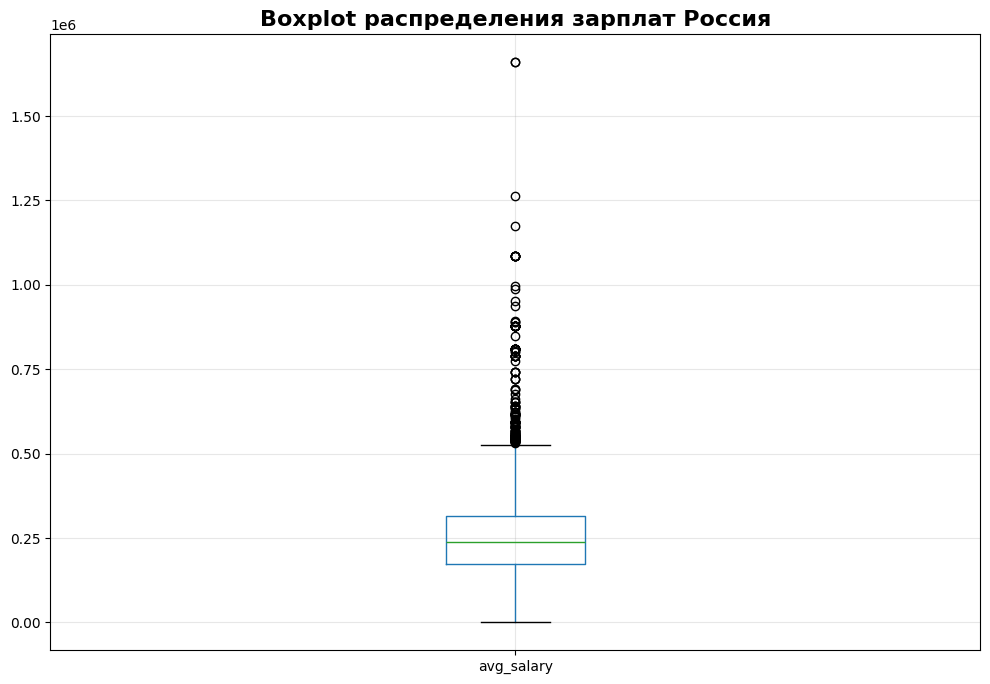

In [ ]:
plt.figure(figsize=(12, 8))
data_clean_USA.boxplot(column='avg_salary')
plt.title('Boxplot распределения зарплат Россия', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.show()

В Сша больше средняя, но максимальная ниже

In [ ]:
data_clean.describe()

,avg_salary
count,2.032000e+04
mean,1.361985e+05
std,8.501019e+04
min,1.950000e+02
25%,8.000000e+04
50%,1.150000e+05
75%,1.650000e+05
max,2.175000e+06


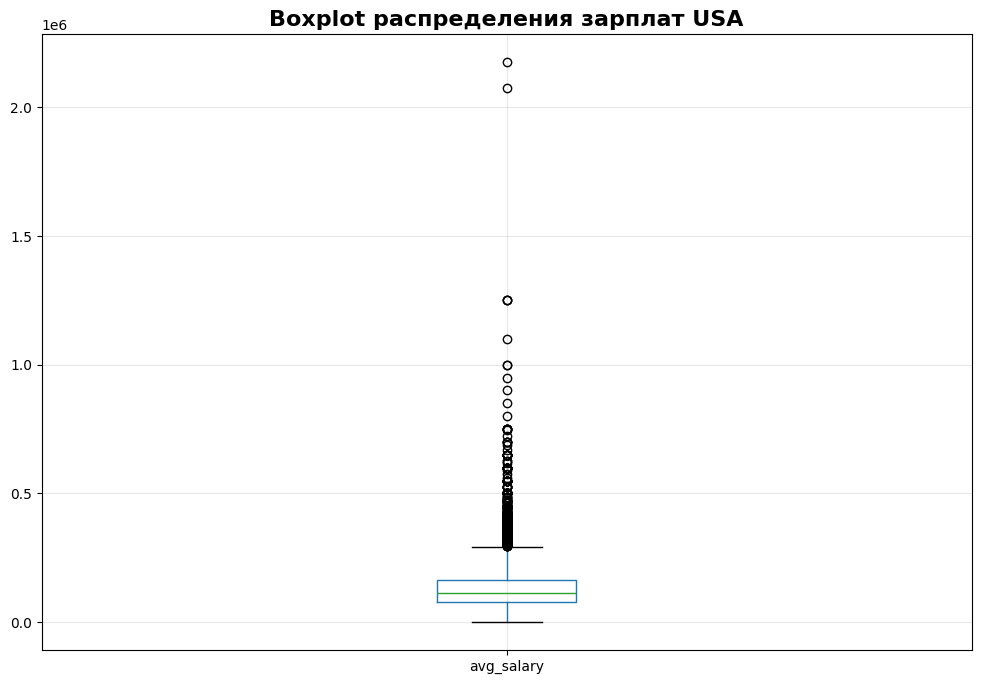

In [ ]:
plt.figure(figsize=(12, 8))
data_clean.boxplot(column='avg_salary')
plt.title('Boxplot распределения зарплат USA', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
#data_clean['remote'].unique()
#data_clean[data_clean['remote']=='Да']
data_clean['remote'].value_counts()
data_clean['city'].value_counts()
data_clean['avg_salary'].nunique()
data_clean['avg_salary'].min()
data_clean[data_clean['avg_salary']<1000]

,title,description,avg_salary,employer,city,search_query,remote,published_at,url,salary_level
15820,Универсальный веб-разработчик,"[programming, ml, analytics, soft]",600.0,Seojazz,Москва,javascript,Удалённая,2025-11-02T11:06:55+0300,https://hh.ru/vacancy/126171655,низкая
33815,Администратор фитнес клуба,[],195.0,Колумб,Новосибирск,NaN,Очная,2025-10-08T10:06:58+0300,https://hh.ru/vacancy/126291328,низкая
38401,"Водитель машинист экскаватора, погрузчика, шак...","[soft, management, support]",650.0,Сабитова Дарина Рифгатовна,Уфа,ai_ml,Очная,2025-10-06T19:57:31+0300,https://hh.ru/vacancy/126210873,низкая
39438,Машинист экскаватора и погрузчика,[support],350.0,Урал-Сервис-Групп,Челябинск,ai_ml,Очная,2025-10-13T12:43:51+0300,https://hh.ru/vacancy/122709830,низкая
39441,Машинист МТЗ,[support],350.0,Урал-Сервис-Групп,Челябинск,ai_ml,Очная,2025-10-13T12:43:56+0300,https://hh.ru/vacancy/122253359,низкая


In [ ]:
data_clean_USA[data_clean_USA['avg_salary']<1000]

,title,employer,city,remote,avg_salary,url,published_at,description,search_query,salary_level
7819,UI/Angular Developer,Enfec,NaN,Remote,987,https://www.simplyhired.com/job/g8Rh4TzkAu1r2r...,NaN,ai,frontend,низкая


In [ ]:
data_clean_USA[data_clean_USA['avg_salary']>1000000]

,title,employer,city,remote,avg_salary,url,published_at,description,search_query,salary_level
662,Data Engineer,Truedge Software Solutions Pvt Ltd,NaN,Remote,1659000,https://www.simplyhired.com/job/aJfEIYjKykUNFt...,NaN,NaN,data_engineering,топ
2422,AI Developer (Gen AI),Elliot Partnership,new_york,Not specified,1086250,https://www.simplyhired.com/job/4-S7-gXHtnzl_B...,2025-11-07,phd,NaN,топ
3437,Data Engineering Manager - Ads,Netflix,NaN,Remote,1264000,https://www.simplyhired.com/job/SqKr6xyixqR0hb...,NaN,NaN,ai_ml,топ
3567,"Research Scientist/Engineer L5/L6, AI for Memb...",Netflix,NaN,Remote,1175125,https://www.simplyhired.com/job/Rw33OBLf735Isk...,NaN,ai,ai_ml,топ
3644,Data Engineer,Truedge Software Solutions Pvt Ltd,NaN,Remote,1659000,https://www.simplyhired.com/job/aJfEIYjKykUNFt...,NaN,NaN,data_engineering,топ
7192,Software Systems Developer (Golang and Python),Elliot Partnership,new_york,Not specified,1086250,https://www.simplyhired.com/job/gTGqM8tJaia8Fd...,2025-10-28,NaN,python,топ
7310,Senior Software Developer,Goliath Partners,new_york,Not specified,1086250,https://www.simplyhired.com/job/LA6l_mE6ySE-2p...,NaN,NaN,python,топ
9082,Senior Software Developer,Goliath Partners,new_york,Not specified,1086250,https://www.simplyhired.com/job/LA6l_mE6ySE-2p...,NaN,NaN,cpp,топ
9585,Software Systems Developer (Golang and Python),Elliot Partnership,new_york,Not specified,1086250,https://www.simplyhired.com/job/gTGqM8tJaia8Fd...,2025-10-28,NaN,golang,топ
9608,Site Reliability Engineer (Python & Go),Elliot Partnership,new_york,Not specified,1086250,https://www.simplyhired.com/job/YcoXGhmJGAcNmc...,2025-11-08,NaN,golang,топ


In [ ]:
data_clean[data_clean['avg_salary']>1000000]

,title,description,avg_salary,employer,city,search_query,remote,published_at,url,salary_level
1133,Брокер по аренде и купле-продаже коммерческой ...,"[ml, analytics]",2175000.0,ДЖЕЙКЕТ РАБОТА,Москва,data_science,Очная,2025-11-02T18:52:26+0300,https://hh.ru/vacancy/126926014,топ
11506,Агент по аренде и купле-продаже коммерческой н...,"[analytics, soft, support]",2075000.0,Агентство недвижимости Hermes Realty,Москва,data_science,Очная,2025-10-10T17:43:37+0300,https://hh.ru/vacancy/126418915,топ
22966,Брокер по аренде офисной недвижимости,"[analytics, sales]",1100000.0,Недвижимость Северо-Запада (ИП Лунев Михаил Ив...,Санкт-Петербург,data_science,Гибрид,2025-10-06T14:08:07+0300,https://hh.ru/vacancy/126187021,топ
25822,Руководитель отдела продаж в сфере недвижимост...,"[analytics, sales]",1250000.0,Сильвер Стрим,Санкт-Петербург,ai_ml,Очная,2025-10-29T14:24:35+0300,https://hh.ru/vacancy/127108864,топ
35657,Руководитель отдела продаж в сфере недвижимост...,"[analytics, sales]",1250000.0,Сильвер Стрим,Екатеринбург,ai_ml,Очная,2025-10-29T14:25:24+0300,https://hh.ru/vacancy/127108907,топ
36942,Руководитель отдела продаж в сфере недвижимост...,"[analytics, sales]",1250000.0,Сильвер Стрим,Нижний Новгород,ai_ml,Очная,2025-10-29T14:26:01+0300,https://hh.ru/vacancy/127108960,топ


Есть большие выбросы по зарплате, где то она заполнена неверно, где то просто проставлены большие зп.


Классифицируем вакансии по уровню зарплаты

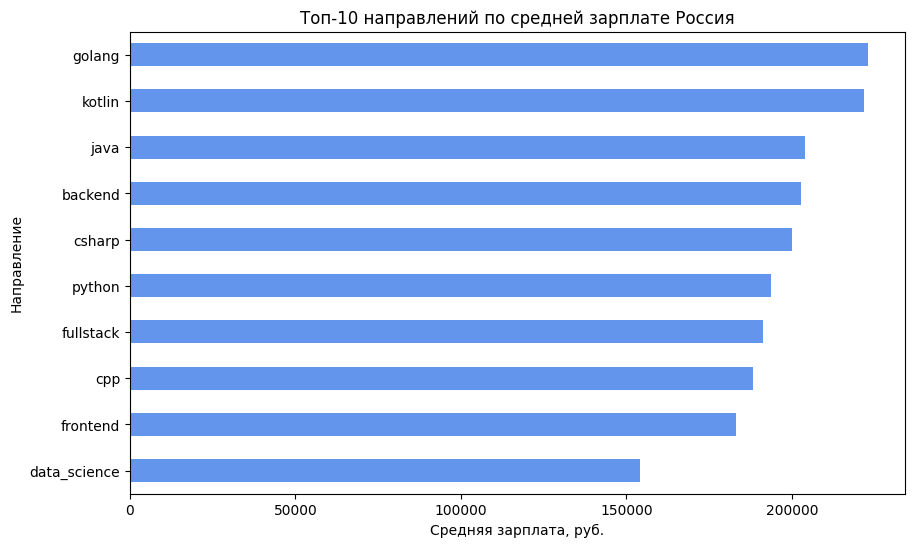

In [ ]:
data_clean['search_query'] = data_clean['search_query'].fillna('1c')
top_directions = (
data_clean.groupby('search_query')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_directions.plot(kind='barh', color='cornflowerblue')
plt.title('Топ-10 направлений по средней зарплате Россия')
plt.xlabel('Средняя зарплата, руб.')
plt.ylabel('Направление')
plt.gca().invert_yaxis()
plt.show()

Самые высокооплачиваемые профессии в России

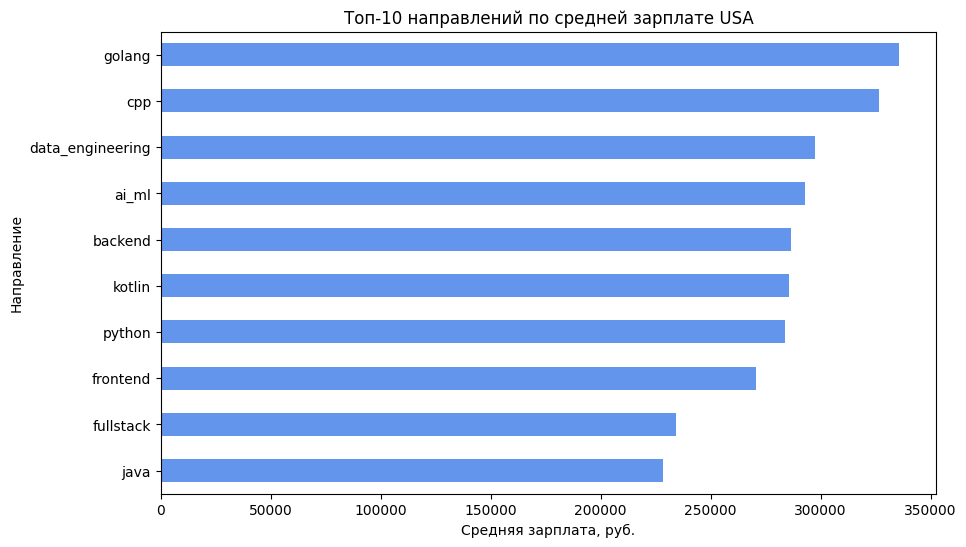

In [ ]:
data_clean_USA['search_query'] = data_clean_USA['search_query'].fillna('1c')
top_directions = (
data_clean_USA.groupby('search_query')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_directions.plot(kind='barh', color='cornflowerblue')
plt.title('Топ-10 направлений по средней зарплате USA')
plt.xlabel('Средняя зарплата, руб.')
plt.ylabel('Направление')
plt.gca().invert_yaxis()
plt.show()

самые высокооплачиваемые направления США

Микровывод: можно заметить, что зарплаты по популярным направлениям в США больше, чем в России. Также, видно что 8 направлений остаются там и там, отличие связано с популярностью ИИ и более продвинутым использованием ИИ в США, из-за чего добавляются новые направления, которые стали очень прибыльными.

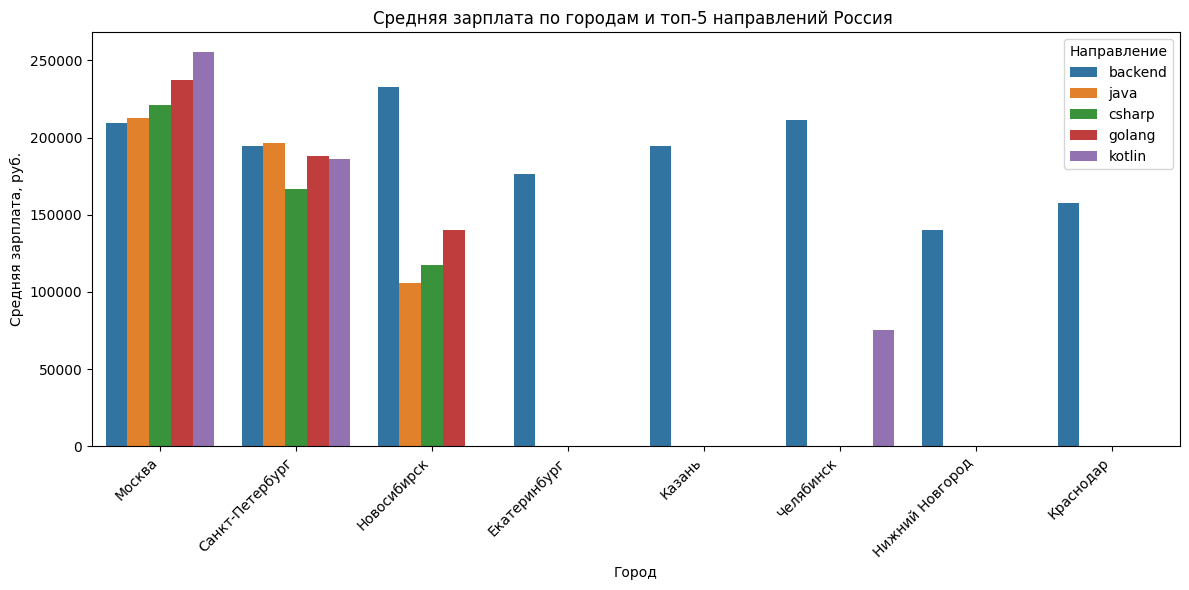

In [ ]:
top_dirs = (
    data_clean.groupby('search_query')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

filtered = data_clean[data_clean['search_query'].isin(top_dirs)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=filtered,
    x='city',
    y='avg_salary',
    hue='search_query',
    estimator='mean',
    errorbar=None
)
plt.title('Средняя зарплата по городам и топ-5 направлений Россия ')
plt.xlabel('Город')
plt.ylabel('Средняя зарплата, руб.')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Направление')
plt.tight_layout()
plt.show()

Можно заметить, что самые популярные направления есть в таких городах как Москва, Санкт-Петербург, Новосибирск. Это может быть связано с большиими перепадами по IT-развитию, из-за чего эти города отстают и им не требуются такие специалисты или же другие города меньше используют ИТ. Зарплаты распределены равномерно между москвой и питером, новосибирск предлагает меньше.

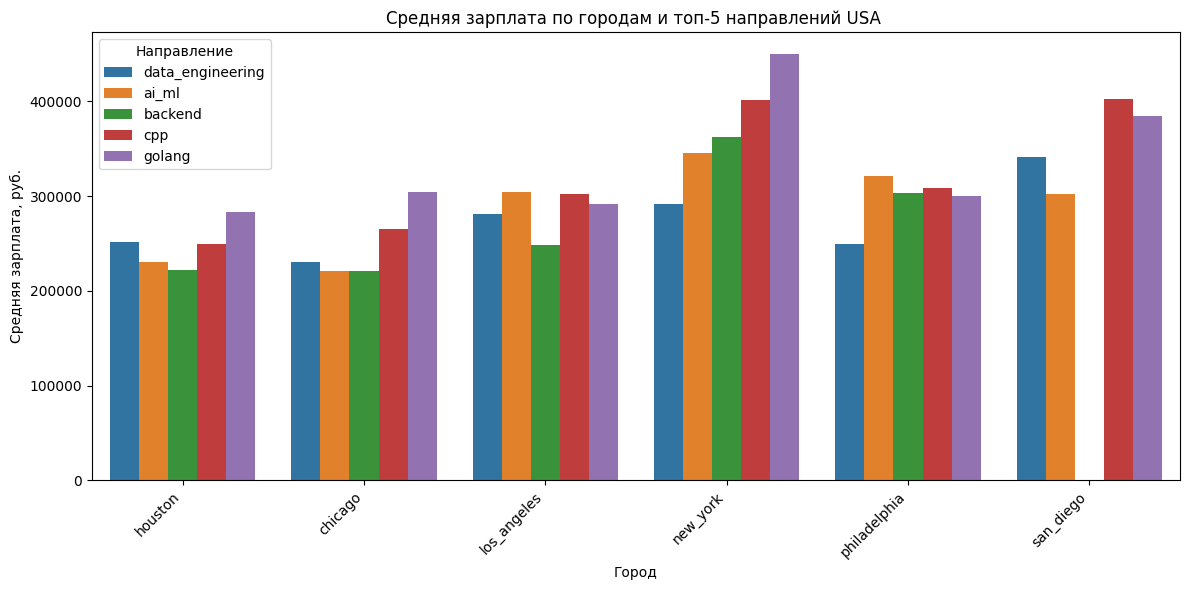

In [ ]:
top_dirs = (
    data_clean_USA.groupby('search_query')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

filtered = data_clean_USA[data_clean_USA['search_query'].isin(top_dirs)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=filtered,
    x='city',
    y='avg_salary',
    hue='search_query',
    estimator='mean',
    errorbar=None
)
plt.title('Средняя зарплата по городам и топ-5 направлений USA ')
plt.xlabel('Город')
plt.ylabel('Средняя зарплата, руб.')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Направление')
plt.tight_layout()
plt.show()

По зарплате этих направлений видно, что нью йорк лидирует, в то время как остальные находятся на одном уровне. Видно, что IT-развиетие каждого города на одном уровне.

Сравнивая Россию и США можно заметить, что IT-инфрастуктура равномерно распределена между города США, в то время как в РФ есть только 3 города.

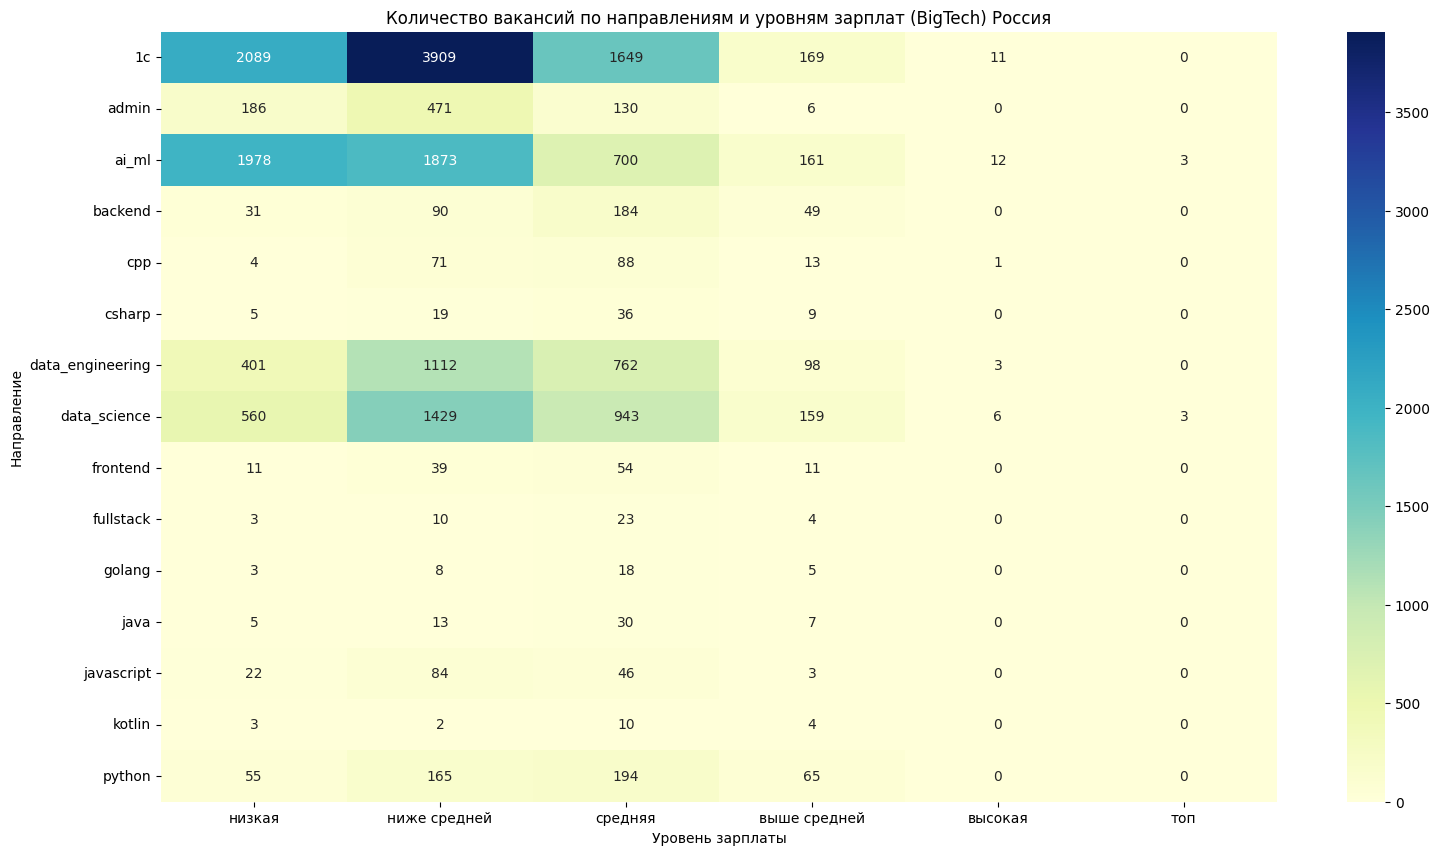

In [ ]:

pivot_table = (
    data_clean
    .pivot_table(
        index='search_query',
        columns='salary_level',
        values='title',
        aggfunc='count',

        observed=False
    )
)

plt.figure(figsize=(18,10))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu'
)
plt.title('Количество вакансий по направлениям и уровням зарплат (BigTech) Россия')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Направление')

plt.show()


Из графика видно, что нехватка специалистов работающих с данными, ИИ и 1с. Также все вакансии распределены в основном с зарплатой низкой, ниже среднего и средней

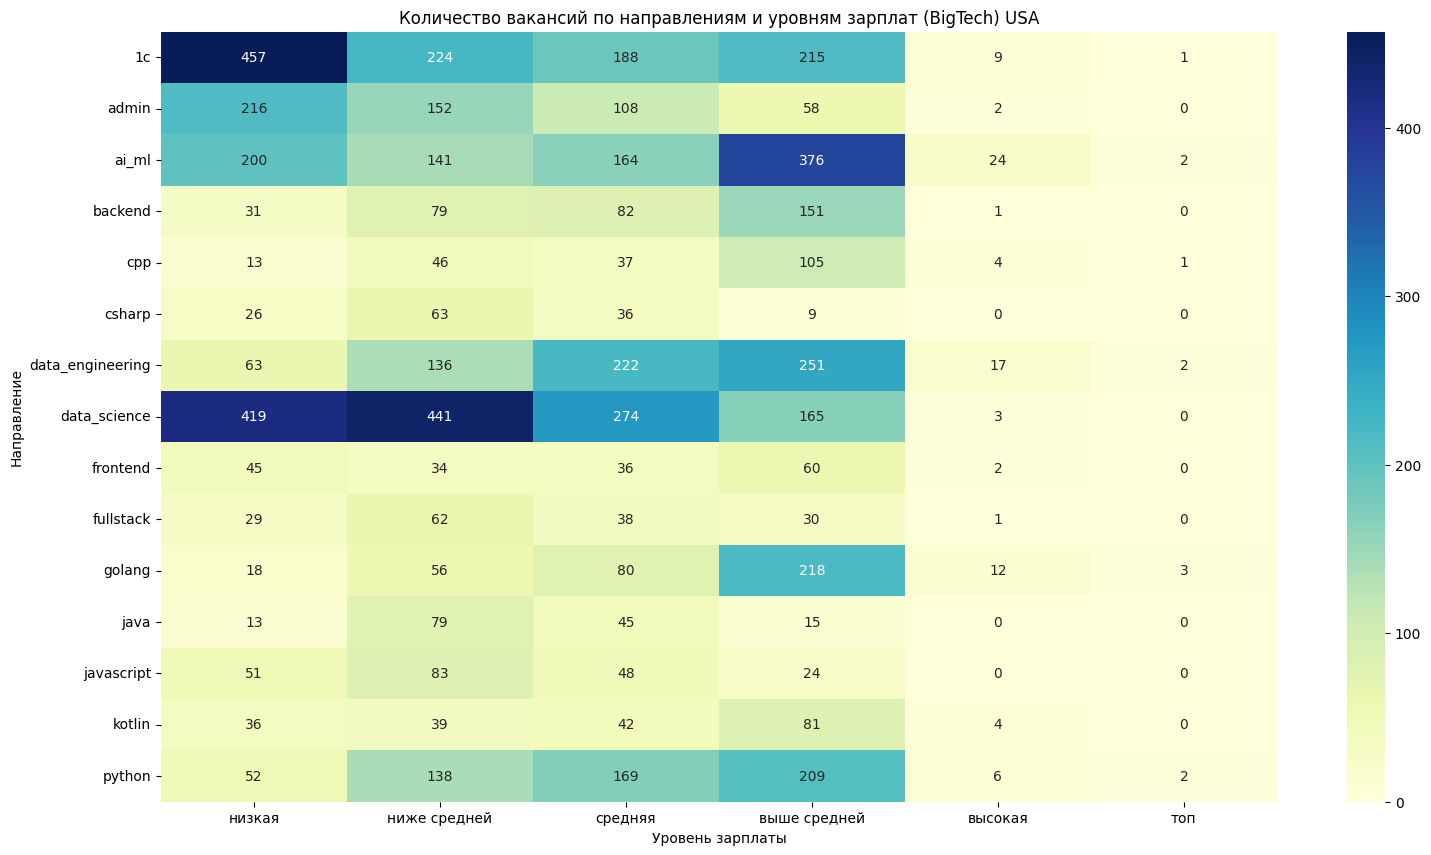

In [ ]:

pivot_table = (
    data_clean_USA
    .pivot_table(
        index='search_query',
        columns='salary_level',
        values='title',
        aggfunc='count',

        observed=False
    )
)

plt.figure(figsize=(18,10))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu'
)
plt.title('Количество вакансий по направлениям и уровням зарплат (BigTech) USA')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Направление')

plt.show()


Данный график показывает, что большая часть вакансии ориентирована на среднюю зп, и вакансии распределены равномерно.Самые популярные направления связаны с ИИ, данными, 1с и питон.

Этот график показывает, какие направления переполнены вакансиями, но с невысокой оплатой,
а какие — наоборот, редкие и дорогие

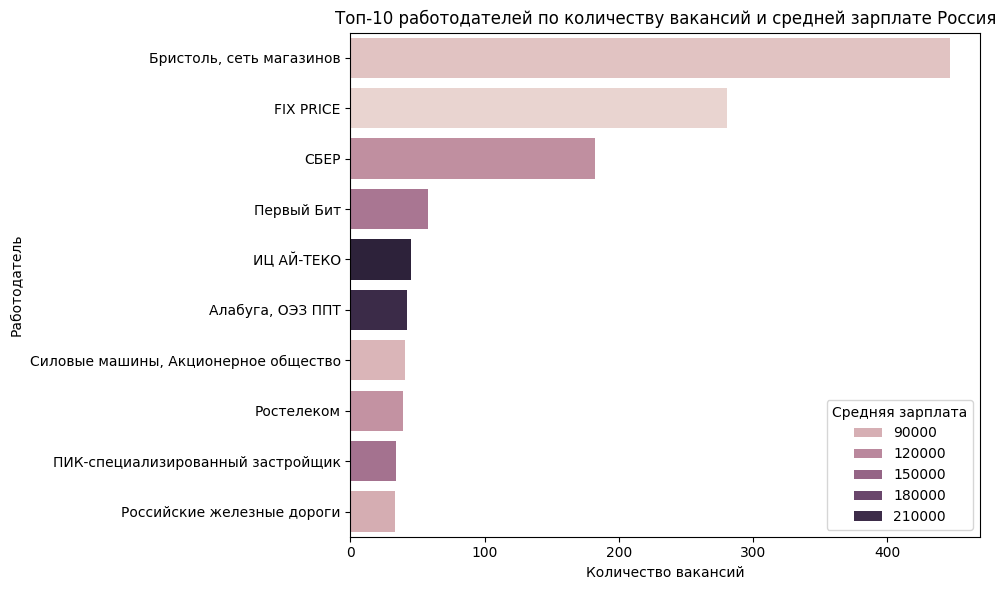

In [ ]:

employer_stats = (
    data_clean.groupby('employer')
    .agg(
        avg_salary=('avg_salary', 'mean'),
        vacancy_count=('title', 'nunique')
    )
    .reset_index()
    .sort_values('vacancy_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=employer_stats,
    x='vacancy_count',
    y='employer',
    hue='avg_salary'
)
plt.title('Топ-10 работодателей по количеству вакансий и средней зарплате Россия')
plt.xlabel('Количество вакансий')
plt.ylabel('Работодатель')
plt.legend(title='Средняя зарплата', loc='lower right')
plt.tight_layout()
plt.show()


Исходя из графика можно понять, какие компании активнее нанимают и сколько платят в среднем.

In [ ]:


city_direction_stats = (
    data_clean.groupby(['city', 'search_query'])
    .agg(
        avg_salary=('avg_salary', 'mean'),
        vacancy_count=('title', 'nunique')
    )
    .reset_index()
)

fig = px.scatter(
    city_direction_stats,
    x='avg_salary',
    y='city',
    size='vacancy_count',
    color='search_query',
    hover_name='search_query',
    hover_data={
        'avg_salary': True,
        'vacancy_count': True,
        'city': False
    },
    size_max=40,
    title='Сравнение зарплат по городам и направлениям Россия',
)

fig.update_layout(
    xaxis_title='Средняя зарплата, руб.',
    yaxis_title='Город',
    legend_title_text='Направление (search_query)',
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


В России идет перевес по 1с и ml и по количеству вакансий в Москве Санкт петербурге и новосибе

In [ ]:


city_direction_stats = (
    data_clean_USA.groupby(['city', 'search_query'])
    .agg(
        avg_salary=('avg_salary', 'mean'),
        vacancy_count=('title', 'nunique')
    )
    .reset_index()
)

fig = px.scatter(
    city_direction_stats,
    x='avg_salary',
    y='city',
    size='vacancy_count',
    color='search_query',
    hover_name='search_query',
    hover_data={
        'avg_salary': True,
        'vacancy_count': True,
        'city': False
    },
    size_max=40,
    title='Сравнение зарплат по городам и направлениям USA',
)

fig.update_layout(
    xaxis_title='Средняя зарплата, руб.',
    yaxis_title='Город',
    legend_title_text='Направление (search_query)',
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


Америка имеет примерно одинаковое распределение по городам, различные направления преобладают и зп выше всего в нью йорке филадельфии и сан диего

In [ ]:


salary_category_stats = (
    data_clean['salary_level']
    .value_counts()
    .reset_index()
    )

fig = px.pie(
    salary_category_stats,
    names='salary_level',
    values='count',
    title='Распределение вакансий по зарплатным категориям Россия',
    hover_data={'count': True}
)

fig.update_traces(textposition='inside')

fig.show()


In [ ]:


salary_category_stats = (
    data_clean_USA['salary_level']
    .value_counts()
    .reset_index()
    )

fig = px.pie(
    salary_category_stats,
    names='salary_level',
    values='count',
    title='Распределение вакансий по зарплатным категориям USA',
    hover_data={'count': True}
)

fig.update_traces(textposition='inside')

fig.show()


В России преобладают зп ниже средей, в то время как в Америке примерно классы распределены поровну, но высоких и топ зп везде мало

In [ ]:
data_clean['published_at'] = pd.to_datetime(data_clean['published_at']).dt.date
#data_clean




In [ ]:
data_clean_USA['published_at'] = pd.to_datetime(data_clean_USA['published_at']).dt.date
#data_clean_USA




тут сделали по нормальному дату

/tmp/ipython-input-388470283.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



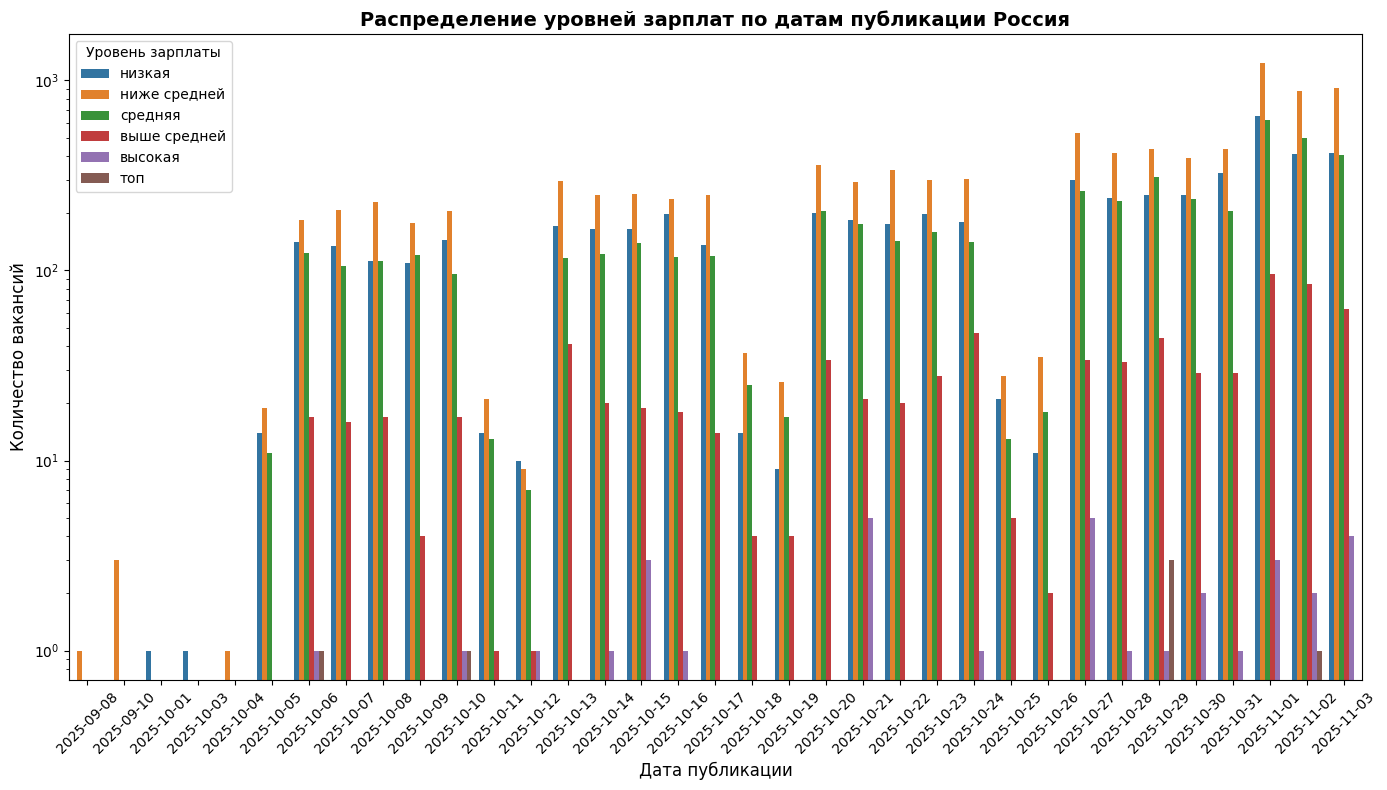

In [ ]:
grouped_data = data_clean.groupby(['published_at', 'salary_level']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data,
    x='published_at',
    y='count',
    hue='salary_level'
)
plt.yscale('log')
plt.title('Распределение уровней зарплат по датам публикации Россия', fontsize=14, fontweight='bold')
plt.xlabel('Дата публикации', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Уровень зарплаты')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1312972810.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



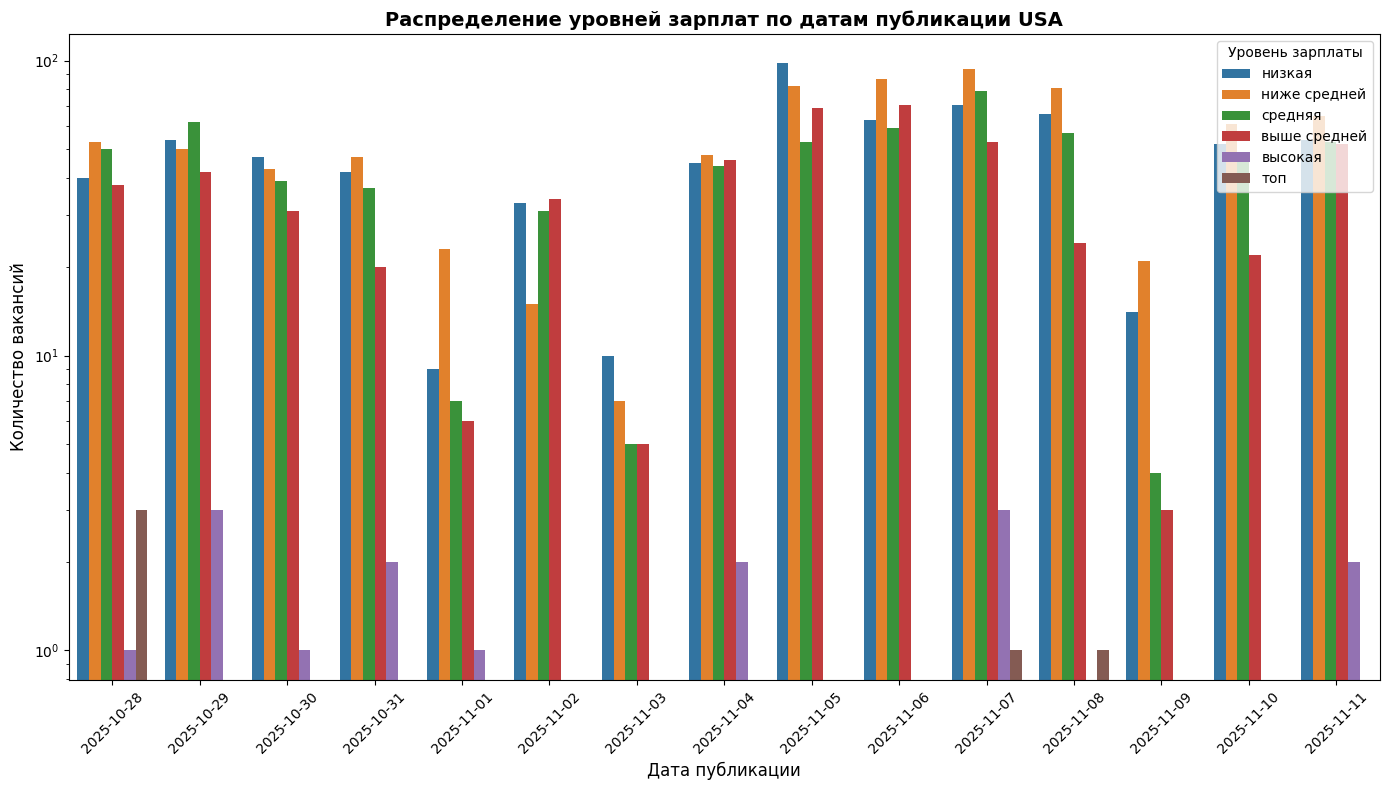

In [ ]:
grouped_data = data_clean_USA.groupby(['published_at', 'salary_level']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data,
    x='published_at',
    y='count',
    hue='salary_level'
)
plt.yscale('log')
plt.title('Распределение уровней зарплат по датам публикации USA', fontsize=14, fontweight='bold')
plt.xlabel('Дата публикации', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Уровень зарплаты')

plt.tight_layout()
plt.show()

В россии явно видны вакансии, которые хранятся больше 2 месяцев, в америке в этом плане все равномерно распределено

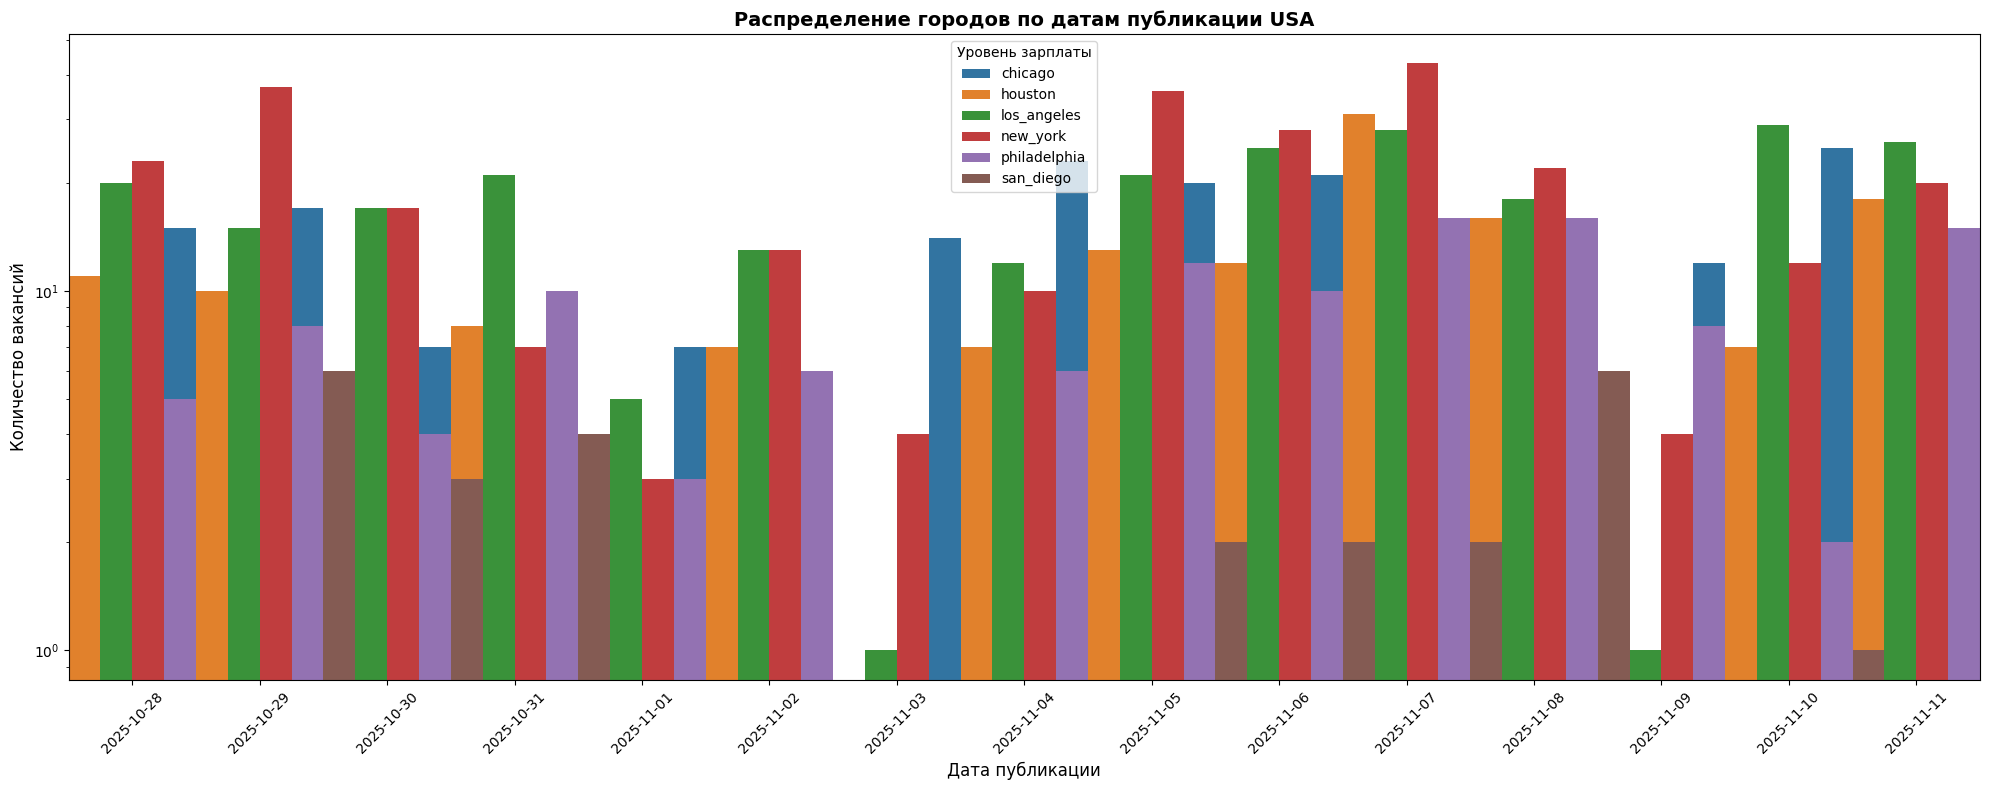

In [ ]:
grouped_data = data_clean_USA.groupby(['published_at', 'city']).size().reset_index(name='count')

plt.figure(figsize=(20, 8))

sns.barplot(
    data=grouped_data,
    x='published_at',
    y='count',
    hue='city',
    width=1.5,

)
plt.yscale('log')
plt.title('Распределение городов по датам публикации USA', fontsize=14, fontweight='bold')
plt.xlabel('Дата публикации', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Уровень зарплаты')
plt.tight_layout()
plt.show()

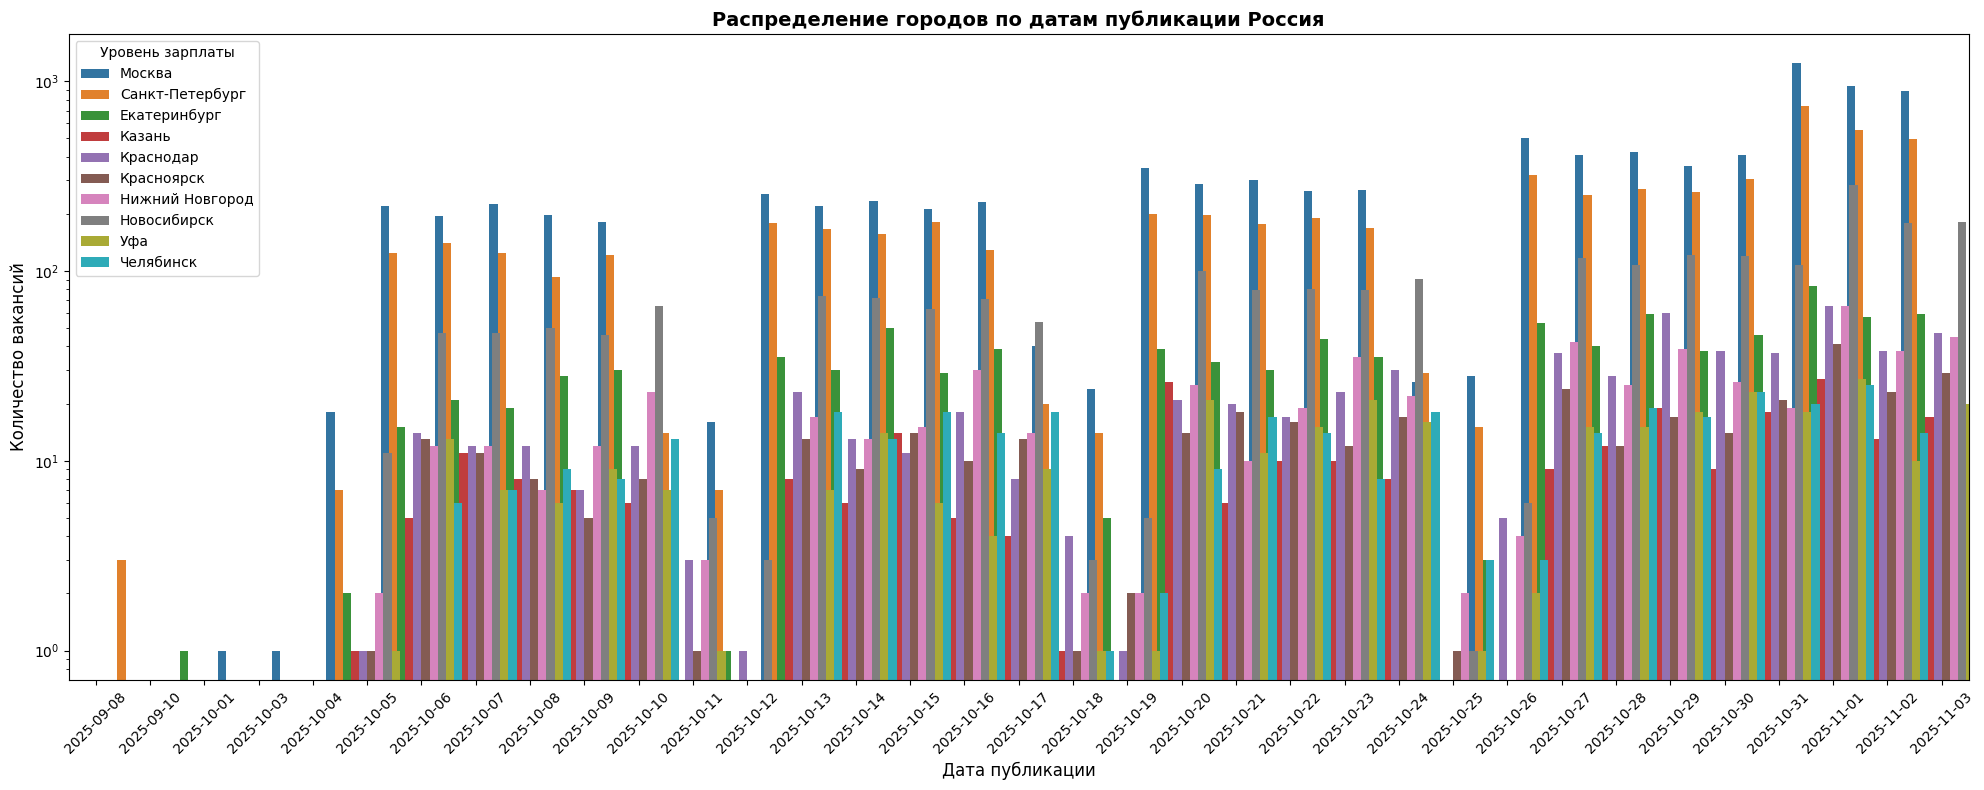

In [ ]:
grouped_data = data_clean.groupby(['published_at', 'city']).size().reset_index(name='count')

plt.figure(figsize=(20, 8))

sns.barplot(
    data=grouped_data,
    x='published_at',
    y='count',
    hue='city',
    width=1.5,

)
plt.yscale('log')
plt.title('Распределение городов по датам публикации Россия', fontsize=14, fontweight='bold')
plt.xlabel('Дата публикации', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Уровень зарплаты')
plt.tight_layout()
plt.show()

In [ ]:
uniq_year=sorted(data_clean['published_at'].unique())
uniq_city=sorted(data_clean['city'].unique())
frame=[[],[],[]]
for year in uniq_year:
  data_sorted_now=data_clean[data_clean['published_at'] == year]
  uniq_city=sorted(data_clean['city'].unique())
  for city in uniq_city:
    frame[0].append(year)
    frame[1].append(city)
    count = (data_sorted_now['city'] == city).sum()
    frame[2].append(count)
final = pd.DataFrame({'Year': frame[0], 'city': frame[1], 'Count': frame[2]})
fig = px.bar(final, x='city', y='Count', color='city',animation_frame='Year',title='Количество открытых вакансий по дням Россия',
           range_y=[0, final['Count'].max()]
            )
fig.show()

In [ ]:
data_clean_USA2 = data_clean_USA.dropna(subset=['published_at'])
data_clean_USA2 = data_clean_USA2.dropna(subset=['city'])
uniq_year=sorted(data_clean_USA2['published_at'].unique())
uniq_city=sorted(data_clean_USA2['city'].unique())
frame=[[],[],[]]
for year in uniq_year:
  data_sorted_now=data_clean_USA2[data_clean_USA2['published_at'] == year]
  uniq_city=sorted(data_clean_USA2['city'].unique())
  for city in uniq_city:
    frame[0].append(year)
    frame[1].append(city)
    count = (data_sorted_now['city'] == city).sum()
    frame[2].append(count)
final = pd.DataFrame({'Year': frame[0], 'city': frame[1], 'Count': frame[2]})
fig = px.bar(final, x='city', y='Count', color='city',animation_frame='Year',title='Количество открытых вакансий по дням USA',
           range_y=[0, final['Count'].max()]
            )
fig.show()

In [ ]:
#data_clean[data_clean['published_at']== '2025-10-04']
from datetime import datetime

filtered_data = data_clean[pd.to_datetime(data_clean['published_at']) < datetime(2025, 10, 4)]
filtered_data

,title,description,avg_salary,employer,city,search_query,remote,published_at,url,salary_level
5670,Персональный водитель,[],127500.0,Дежурный по Бизнесу,Москва,ai_ml,Очная,2025-09-08,https://hh.ru/vacancy/124982719,ниже средней
20669,Junior маркетолог,"[ml, analytics, hard, soft, marketing]",75000.0,ДиГрей Эстейт технолоджи,Москва,1c,Очная,2025-10-03,https://hh.ru/vacancy/124438728,низкая
27186,Менеджер по развитию объектов сети «Квадрошина»,[],100000.0,JS-service,Санкт-Петербург,javascript,Очная,2025-09-10,https://hh.ru/vacancy/125151566,ниже средней
27200,Руководитель отдела продаж (магазин легковых шин),"[hard, sales, marketing]",120000.0,JS-service,Санкт-Петербург,javascript,Очная,2025-09-10,https://hh.ru/vacancy/125151556,ниже средней
27545,Системный администратор,[],100000.0,Отель Костас,Санкт-Петербург,admin,Очная,2025-09-10,https://hh.ru/vacancy/125151575,ниже средней
35312,Обрубщик ( зачистка металла),[],80000.0,Строп-комплект,Екатеринбург,ai_ml,Очная,2025-10-01,https://hh.ru/vacancy/123590540,низкая


ну тут можно какие то выводы сделать что вот и долбебы вакансии неправильно ставят и хуево заполняют заявки Здесь в России много висит давно вакансий, а в Америке нет

In [ ]:
data_clean

,title,description,avg_salary,employer,city,search_query,remote,published_at,url,salary_level
3,Системный аналитик,"[analytics, soft, support]",400000.0,Bgstaff,Москва,data_science,Гибрид,2025-10-08,https://hh.ru/vacancy/126311801,выше средней
5,Data Scientist (Junior),"[programming, ml, support]",100000.0,BND LLC,Москва,data_science,Гибрид,2025-11-01,https://hh.ru/vacancy/126718438,ниже средней
8,"Junior Data Scientist (Python, ML) / Дата-сайе...","[programming, ml, analytics, soft]",90000.0,Rubbles,Москва,data_science,Удалённая,2025-10-28,https://hh.ru/vacancy/127063385,ниже средней
9,Ведущий разработчик искусственного интеллекта/...,"[ml, analytics, hard, support]",180000.0,Геномед,Москва,data_science,Удалённая,2025-10-27,https://hh.ru/vacancy/126970916,средняя
14,Data Scientist,"[ml, dataeng]",325000.0,LIAN,Москва,data_science,Удалённая,2025-10-31,https://hh.ru/vacancy/127181192,выше средней
...,...,...,...,...,...,...,...,...,...,...
39608,Ведущий системный администратор,[analytics],115000.0,ГК Планета Авто,Челябинск,admin,Очная,2025-11-01,https://hh.ru/vacancy/125639010,ниже средней
39609,Ведущий системный администратор,[],100000.0,Уральский Комплектующий Завод,Челябинск,admin,Очная,2025-10-22,https://hh.ru/vacancy/125938955,ниже средней
39610,Ведущий инженер отдела информационных технологий,"[devops, support]",70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,admin,Очная,2025-10-27,https://hh.ru/vacancy/126696734,низкая
39611,Системный администратор (ведущий инженер отдел...,"[soft, support]",55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,admin,Очная,2025-10-27,https://hh.ru/vacancy/124687789,низкая


*Корреляции*

In [ ]:
from datetime import datetime
current_date = datetime(2025, 11, 4)
df_corr = data_clean
df_corr['published_at'] = pd.to_datetime(df_corr['published_at'])
days_ago = (current_date - df_corr['published_at']).dt.days
def date(days):
    if days == 0:
        return 'today'
    elif days <= 1:
        return '1_day'
    elif days <= 7:
        return '1_week'
    elif days <= 30:
        return '1_month'
    elif days <= 60:
        return '2_months'
    else:
        return 'more_than_2_months'

df_corr['time_period'] = days_ago.apply(date)
time_period_encoded = {
    'today': 0,
    '1_day': 1,
    '1_week': 2,
    '1_month': 3,
    '2_months': 4,
    'more_than_2_months': 5
}
df_corr['time_period_encoded'] = df_corr['time_period'].map(time_period_encoded)

cities = df_corr['city'].unique()
city_dict = {}
for i, city in enumerate(sorted(cities)):
    city_dict[city] = i
df_corr['city_encoded'] = df_corr['city'].apply(lambda x: city_dict[x])


skills_list = ['programming', 'ml', 'dataeng', 'analytics', 'devops', 'hard',
              'soft', 'management', 'hr', 'sales', 'design', 'support',
              'marketing', 'qa']
for skill in skills_list:
    df_corr[f'skill_{skill}'] = df_corr['description'].apply(
        lambda x: 1 if skill in str(x).lower() else 0
    )

remote_dict = {
    'Удалённая': 0,
    'Гибрид': 1,
    'Очная': 2
}
df_corr['remote_encoded'] = df_corr['remote'].apply(lambda x: remote_dict[x])


existing_queries = df_corr['search_query'].unique()
actual_search = {}

search_query_dict = {
    'data_science': 0, 'ai_ml': 1, 'python': 2, 'data_engineering': 3,
    'backend': 4, 'fullstack': 5, 'frontend': 6, '1c': 7, 'admin': 8,
    'javascript': 9, 'java': 10, 'csharp': 11, 'cpp': 12, 'golang': 13, 'kotlin': 14
}
df_corr['search_query_encoded'] = df_corr['search_query'].apply(lambda x: search_query_dict[x])
salary_level_map = {
    'низкая': 1,
    'ниже средней': 2,
    'средняя': 3,
    'выше средней': 4,
    'высокая': 5,
    'топ': 6
}
df_corr['salary_level_encoded'] = df_corr['salary_level'].apply(lambda x: salary_level_map[x])

df_corr

,title,description,avg_salary,employer,city,search_query,remote,published_at,url,salary_level,...,skill_management,skill_hr,skill_sales,skill_design,skill_support,skill_marketing,skill_qa,remote_encoded,search_query_encoded,salary_level_encoded
3,Системный аналитик,"[analytics, soft, support]",400000.0,Bgstaff,Москва,data_science,Гибрид,2025-10-08,https://hh.ru/vacancy/126311801,выше средней,...,0,0,0,0,1,0,0,1,0,4
5,Data Scientist (Junior),"[programming, ml, support]",100000.0,BND LLC,Москва,data_science,Гибрид,2025-11-01,https://hh.ru/vacancy/126718438,ниже средней,...,0,0,0,0,1,0,0,1,0,2
8,"Junior Data Scientist (Python, ML) / Дата-сайе...","[programming, ml, analytics, soft]",90000.0,Rubbles,Москва,data_science,Удалённая,2025-10-28,https://hh.ru/vacancy/127063385,ниже средней,...,0,0,0,0,0,0,0,0,0,2
9,Ведущий разработчик искусственного интеллекта/...,"[ml, analytics, hard, support]",180000.0,Геномед,Москва,data_science,Удалённая,2025-10-27,https://hh.ru/vacancy/126970916,средняя,...,0,0,0,0,1,0,0,0,0,3
14,Data Scientist,"[ml, dataeng]",325000.0,LIAN,Москва,data_science,Удалённая,2025-10-31,https://hh.ru/vacancy/127181192,выше средней,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39608,Ведущий системный администратор,[analytics],115000.0,ГК Планета Авто,Челябинск,admin,Очная,2025-11-01,https://hh.ru/vacancy/125639010,ниже средней,...,0,0,0,0,0,0,0,2,8,2
39609,Ведущий системный администратор,[],100000.0,Уральский Комплектующий Завод,Челябинск,admin,Очная,2025-10-22,https://hh.ru/vacancy/125938955,ниже средней,...,0,0,0,0,0,0,0,2,8,2
39610,Ведущий инженер отдела информационных технологий,"[devops, support]",70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,admin,Очная,2025-10-27,https://hh.ru/vacancy/126696734,низкая,...,0,0,0,0,1,0,0,2,8,1
39611,Системный администратор (ведущий инженер отдел...,"[soft, support]",55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,admin,Очная,2025-10-27,https://hh.ru/vacancy/124687789,низкая,...,0,0,0,0,1,0,0,2,8,1


In [ ]:
df_corr.info()
corr_columns = df_corr.columns[df_corr.columns.get_loc('time_period_encoded'):]
correlation_matrix = df_corr[corr_columns].corr()
correlation_matrix

<class 'pandas.core.frame.DataFrame'>
Index: 20320 entries, 3 to 39612
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 20320 non-null  object        
 1   description           20320 non-null  object        
 2   avg_salary            20320 non-null  float64       
 3   employer              20320 non-null  object        
 4   city                  20320 non-null  object        
 5   search_query          20320 non-null  object        
 6   remote                20320 non-null  object        
 7   published_at          20320 non-null  datetime64[ns]
 8   url                   20320 non-null  object        
 9   salary_level          20320 non-null  category      
 10  time_period           20320 non-null  object        
 11  time_period_encoded   20320 non-null  int64         
 12  city_encoded          20320 non-null  int64         
 13  skill_programming    

,time_period_encoded,city_encoded,skill_programming,skill_ml,skill_dataeng,skill_analytics,skill_devops,skill_hard,skill_soft,skill_management,skill_hr,skill_sales,skill_design,skill_support,skill_marketing,skill_qa,remote_encoded,search_query_encoded,salary_level_encoded
time_period_encoded,1.000000,-0.005205,0.013981,0.003072,0.006418,-0.012270,-0.007319,-0.019767,-0.002543,-0.005083,-0.011325,-0.061811,-0.009212,0.021389,-0.027944,0.003657,0.016692,-0.042422,-0.021331
city_encoded,-0.005205,1.000000,-0.050333,-0.057797,-0.021918,-0.075291,-0.035167,-0.019976,-0.014729,0.001626,0.022910,0.012147,-0.035013,-0.019106,-0.043060,-0.020902,0.105558,0.183279,-0.098794
skill_programming,0.013981,-0.050333,1.000000,0.156797,0.118240,0.118891,0.160789,-0.054949,0.024428,-0.022005,-0.038398,-0.042421,0.047163,0.067041,-0.028001,0.098936,-0.165941,0.022446,0.161475
skill_ml,0.003072,-0.057797,0.156797,1.000000,0.080679,0.073879,0.059134,0.061362,0.012303,-0.014139,-0.007191,-0.017135,0.223790,-0.020567,0.200547,0.016174,-0.231030,-0.072974,0.024936
skill_dataeng,0.006418,-0.021918,0.118240,0.080679,1.000000,0.132540,0.098506,-0.006351,0.019522,-0.002882,-0.006752,-0.034778,-0.010261,0.029755,-0.013161,0.025300,-0.090127,-0.051472,0.099797
skill_analytics,-0.012270,-0.075291,0.118891,0.073879,0.132540,1.000000,0.092480,0.121100,0.142076,0.105085,0.002452,0.078194,0.011404,-0.029223,0.213434,0.093339,-0.236718,-0.333481,0.135059
skill_devops,-0.007319,-0.035167,0.160789,0.059134,0.098506,0.092480,1.000000,0.009430,0.039181,0.029772,-0.026514,-0.038921,0.026274,0.117392,0.032842,0.071538,-0.120046,0.003726,0.117905
skill_hard,-0.019767,-0.019976,-0.054949,0.061362,-0.006351,0.121100,0.009430,1.000000,0.055613,0.026268,-0.012930,0.072365,0.029925,-0.091128,0.355659,-0.014019,-0.037563,-0.074303,-0.018792
skill_soft,-0.002543,-0.014729,0.024428,0.012303,0.019522,0.142076,0.039181,0.055613,1.000000,0.534494,0.056074,0.046661,0.039330,-0.024224,0.055582,0.036381,-0.081311,-0.025464,0.111555
skill_management,-0.005083,0.001626,-0.022005,-0.014139,-0.002882,0.105085,0.029772,0.026268,0.534494,1.000000,0.075306,0.074046,0.012543,-0.011433,0.046996,0.014339,-0.036705,0.014108,0.112318


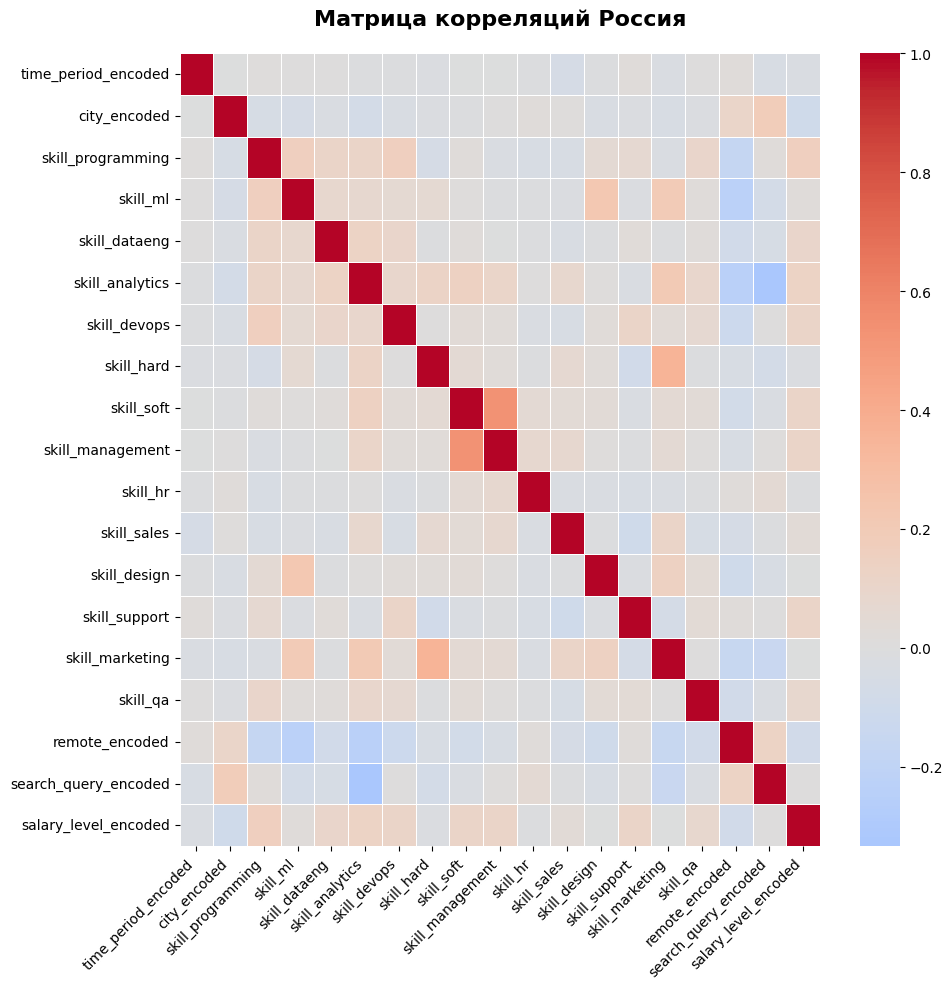

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            )
plt.title('Матрица корреляций Россия', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data_clean_USA['salary_level'].unique()

['низкая', 'ниже средней', 'средняя', 'выше средней', 'высокая', 'топ']
Categories (6, object): ['низкая' < 'ниже средней' < 'средняя' < 'выше средней' < 'высокая' < 'топ']

In [ ]:

cities = ['philadelphia', 'houston', 'los_angeles', 'chicago', 'new_york', 'san_diego']
city_dict = {city: i for i, city in enumerate(sorted(cities))}
data_clean_USA['city_encoded'] = data_clean_USA['city'].apply(lambda x: city_dict.get(x, -1) if pd.notna(x) else -1)

skill_groups = {
    'programming_languages': [
        'python', 'sql', 'java', 'javascript', 'typescript', 'c#', 'c sharp',
        'c++', 'cpp', 'golang', 'go ', 'r ', 'r,', 'r;', 'r language',
        'kotlin', 'scala', 'ruby', 'php', 'swift', 'rust'
    ],
    'data_ml_tools': [
        'machine learning', 'ml', 'ai', 'artificial intelligence', 'data science',
        'deep learning', 'tensorflow', 'pytorch', 'keras', 'scikit-learn', 'sklearn',
        'nlp', 'natural language processing', 'computer vision', 'cv',
        'llm', 'large language model', 'generative ai', 'genai',
        'spark', 'hadoop', 'kafka', 'airflow', 'dbt', 'snowflake', 'databricks',
        'tableau', 'power bi', 'looker', 'qlik', 'sas', 'matlab', 'data analysis'
    ],
    'cloud_devops': [
        'aws', 'azure', 'gcp', 'google cloud', 'docker', 'kubernetes', 'k8s',
        'terraform', 'jenkins', 'ci/cd', 'continuous integration', 'ansible',
        'puppet', 'chef', 'grafana', 'prometheus', 'splunk', 'git'
    ],
    'web_frameworks': [
        'react', 'angular', 'vue', 'node.js', 'nodejs', 'django', 'flask',
        'spring', 'express', 'laravel'
    ],
    'education_requirements': [
        'degree', 'bachelor', 'master', 'phd', 'ph.d'
    ],
    'soft_skills': [
        'experience', 'analytical', 'problem solving', 'communication',
        'leadership', 'teamwork'
    ]
}

for group_name, keywords in skill_groups.items():
    data_clean_USA[f'group_{group_name}'] = data_clean_USA['description'].apply(
        lambda x: 1 if any(keyword in str(x).lower() for keyword in keywords) else 0
    )


remote_dict = {
    'Remote': 0,
    'Not specified': 1
}
data_clean_USA['remote_encoded'] = data_clean_USA['remote'].apply(lambda x: remote_dict.get(x, 1))

search_query_dict = {
    'data_science': 0,
    'data_engineering': 1,
    'ai_ml': 2,
    'python': 3,
    'backend': 4,
    'frontend': 5,
    'fullstack': 6,
    'java': 7,
    'csharp': 8,
    'cpp': 9,
    'javascript': 10,
    'golang': 11,
    'kotlin': 12,
    'admin': 13,
    '1c': 14
}
data_clean_USA['search_query_encoded'] = data_clean_USA['search_query'].apply(lambda x: search_query_dict.get(x, -1))

salary_level_map = {
    'низкая': 1,
    'ниже средней': 2,
    'средняя': 3,
    'выше средней': 4,
    'высокая': 5,
    'топ': 6
}
data_clean_USA['salary_level_encoded'] = data_clean_USA['salary_level'].apply(lambda x: salary_level_map.get(x, 3))





In [ ]:
data_clean_USA.info()
corr_columns = data_clean_USA.columns[data_clean_USA.columns.get_loc('city_encoded'):]
correlation_matrix = data_clean_USA[corr_columns].corr()
correlation_matrix

<class 'pandas.core.frame.DataFrame'>
Index: 7074 entries, 0 to 15211
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   title                         7074 non-null   object  
 1   employer                      7073 non-null   object  
 2   city                          2785 non-null   object  
 3   remote                        7074 non-null   object  
 4   avg_salary                    7074 non-null   Int64   
 5   url                           7074 non-null   object  
 6   published_at                  2640 non-null   object  
 7   description                   3879 non-null   object  
 8   search_query                  7074 non-null   object  
 9   salary_level                  7074 non-null   category
 10  city_encoded                  7074 non-null   int64   
 11  group_programming_languages   7074 non-null   int64   
 12  group_data_ml_tools           7074 non-null   int64 

,city_encoded,group_programming_languages,group_data_ml_tools,group_cloud_devops,group_web_frameworks,group_education_requirements,group_soft_skills,remote_encoded,search_query_encoded,salary_level_encoded
city_encoded,1.000000,0.005373,0.002579,-0.012922,-0.007239,0.001620,0.009041,0.523762,0.004815,0.033952
group_programming_languages,0.005373,1.000000,0.029623,0.018202,0.179595,0.495304,0.155009,0.045687,-0.052190,-0.018492
group_data_ml_tools,0.002579,0.029623,1.000000,0.001404,0.014846,-0.051830,0.027649,0.015381,-0.056511,-0.054782
group_cloud_devops,-0.012922,0.018202,0.001404,1.000000,0.065949,-0.047135,0.089261,-0.001939,0.044363,-0.001129
group_web_frameworks,-0.007239,0.179595,0.014846,0.065949,1.000000,-0.052047,0.053556,0.005158,0.046348,-0.013499
group_education_requirements,0.001620,0.495304,-0.051830,-0.047135,-0.052047,1.000000,0.045591,0.003691,-0.068639,-0.019699
group_soft_skills,0.009041,0.155009,0.027649,0.089261,0.053556,0.045591,1.000000,0.007415,-0.011676,-0.005221
remote_encoded,0.523762,0.045687,0.015381,-0.001939,0.005158,0.003691,0.007415,1.000000,0.006534,-0.003765
search_query_encoded,0.004815,-0.052190,-0.056511,0.044363,0.046348,-0.068639,-0.011676,0.006534,1.000000,-0.089742
salary_level_encoded,0.033952,-0.018492,-0.054782,-0.001129,-0.013499,-0.019699,-0.005221,-0.003765,-0.089742,1.000000


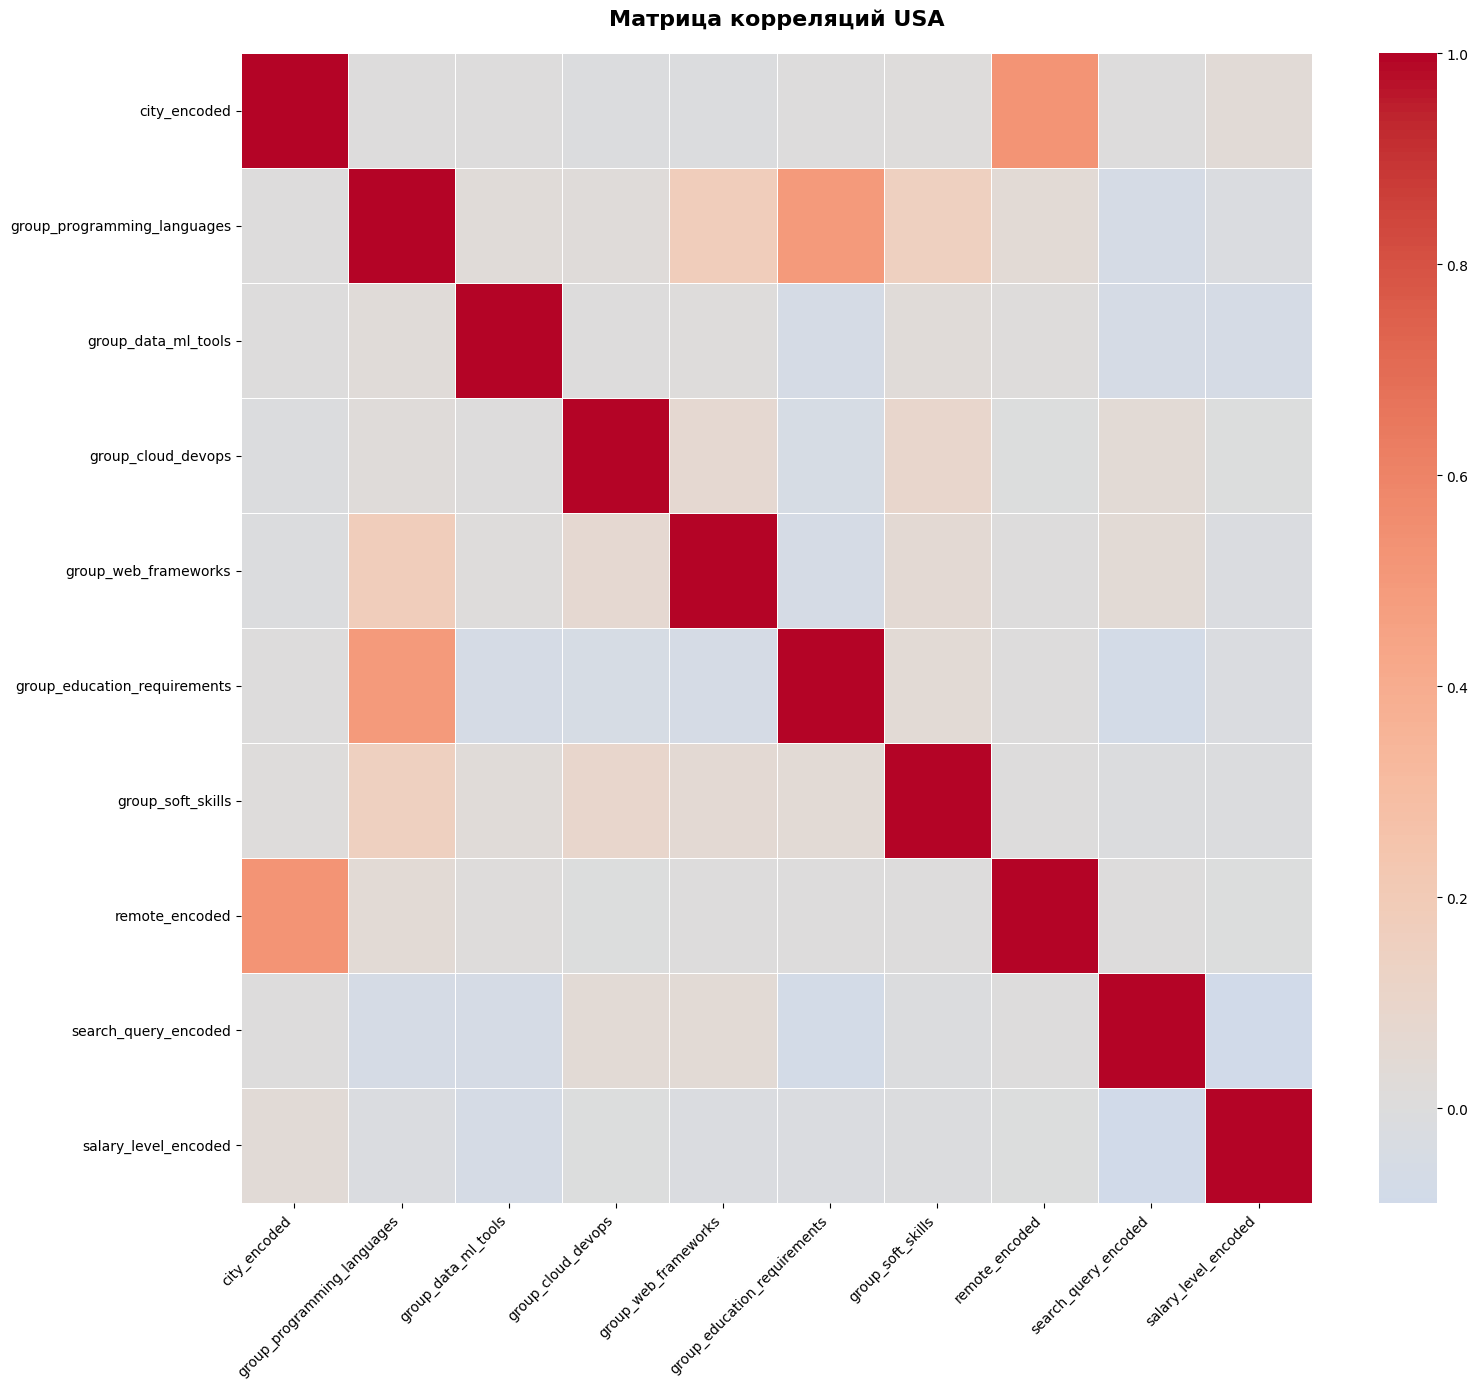

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            )
plt.title('Матрица корреляций USA', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()